In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import math
from statistics import mean
from datetime import timedelta
from sklearn.metrics import mean_squared_error

from datetime import date
import datetime
import holidays

In [2]:
status = pd.read_csv('../../../status.csv')

In [3]:
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str) + '/' + status['hour'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'], format='%Y/%m/%d/%H', infer_datetime_format=True)

#曜日を追加するための関数を定義
def get_weekday_jp(dt):
    w_list = ['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日']
    return(w_list[dt.weekday()])

#dateから曜日情報を取得
status["weekday"] = status["date"].apply(get_weekday_jp)

main_df = status[['date', 'year', 'day', 'hour', 'station_id', 'bikes_available', 'weekday']]

#カテゴリ変数をダミー変数化
main_df = pd.get_dummies(main_df)

train = main_df[main_df['date'] >= '2013-10-01']
train = train[train['date'] < '2013-11-01']
#train = train[train['station_id'] == 0] 

train_df = train 
train

date  year  day  hour  station_id  bikes_available  \
720     2013-10-01 00:00:00  2013    1     0           0             16.0   
721     2013-10-01 01:00:00  2013    1     1           0             14.0   
722     2013-10-01 02:00:00  2013    1     2           0             14.0   
723     2013-10-01 03:00:00  2013    1     3           0             14.0   
724     2013-10-01 04:00:00  2013    1     4           0             14.0   
...                     ...   ...  ...   ...         ...              ...   
1210339 2013-10-31 19:00:00  2013   31    19          69              NaN   
1210340 2013-10-31 20:00:00  2013   31    20          69              NaN   
1210341 2013-10-31 21:00:00  2013   31    21          69              NaN   
1210342 2013-10-31 22:00:00  2013   31    22          69              NaN   
1210343 2013-10-31 23:00:00  2013   31    23          69              NaN   

         weekday_土曜日  weekday_日曜日  weekday_月曜日  weekday_木曜日  weekday_水曜日  \
720                0            0            0            0            0   
721                0            0            0            0            0   
722                0            0            0            0            0   
723                0            0            0            0            0   
724                0            0            0            0            0   
...              ...          ...          ...          ...          ...   
1210339            0            0            0            1            0   
1210340            0            0            0            1            0   
1210341            0            0            0            1            0   
1210342            0            0            0            1            0   
1210343            0            0            0            1            0   

         weekday_火曜日  weekday_金曜日  
720                1            0  
721                1            0  
722                1            0  
723                1            0  
724                1            0  
...              ...          ...  
1210339            0            0  
1210340            0            0  
1210341            0            0  
1210342            0            0  
1210343            0            0  

[52080 rows x 13 columns]

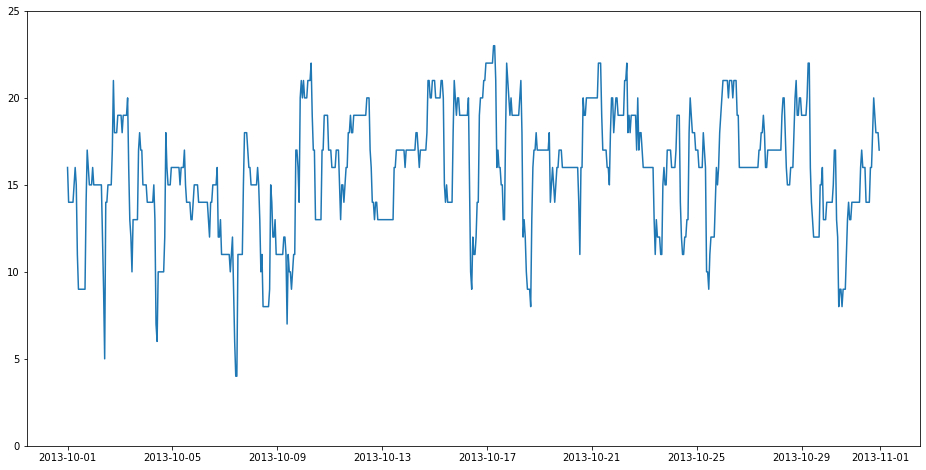

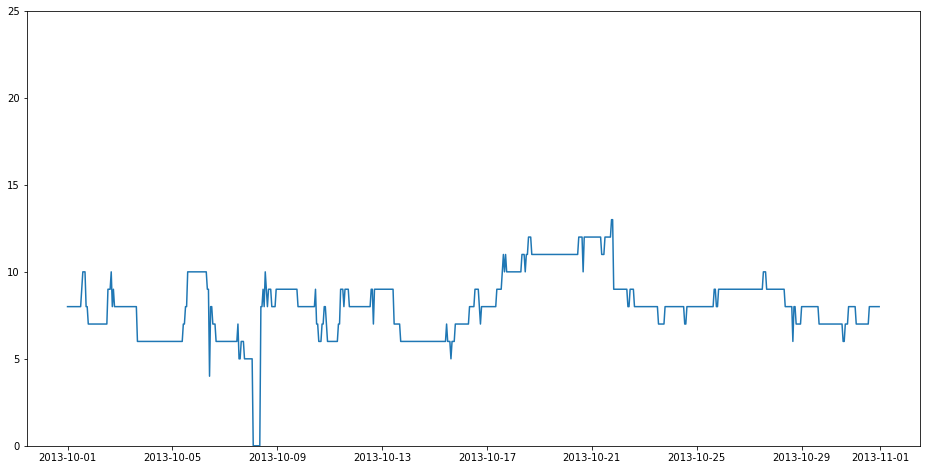

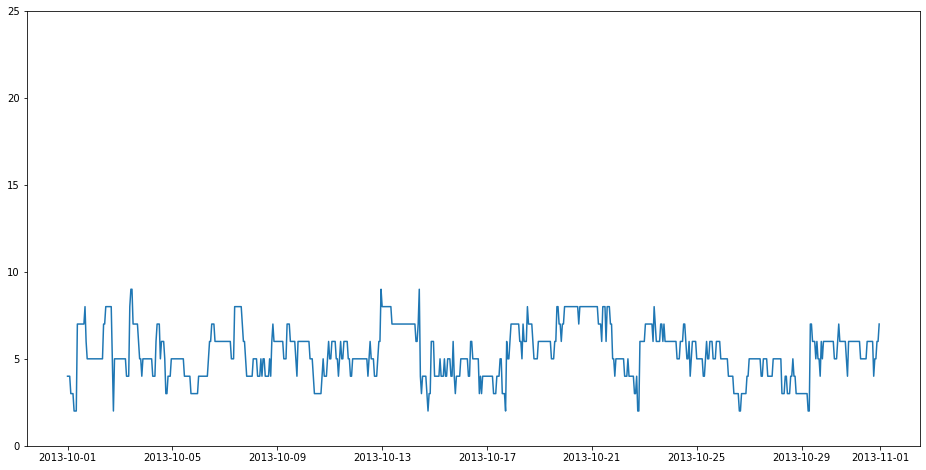

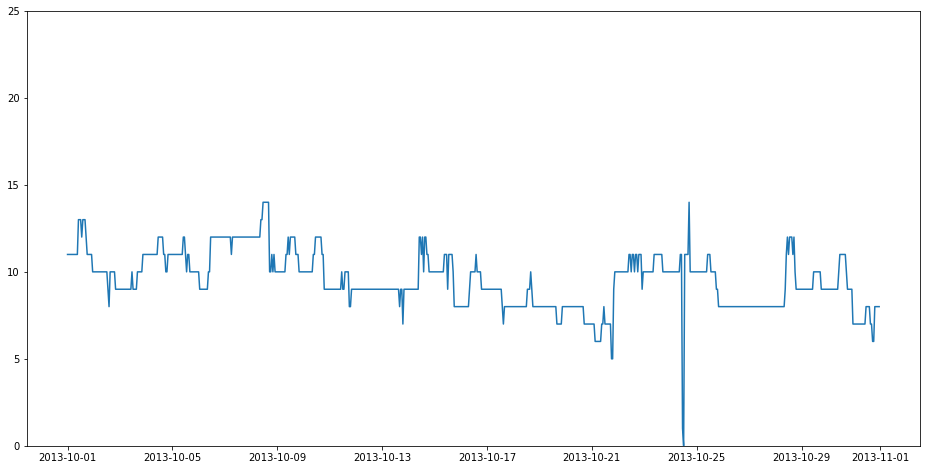

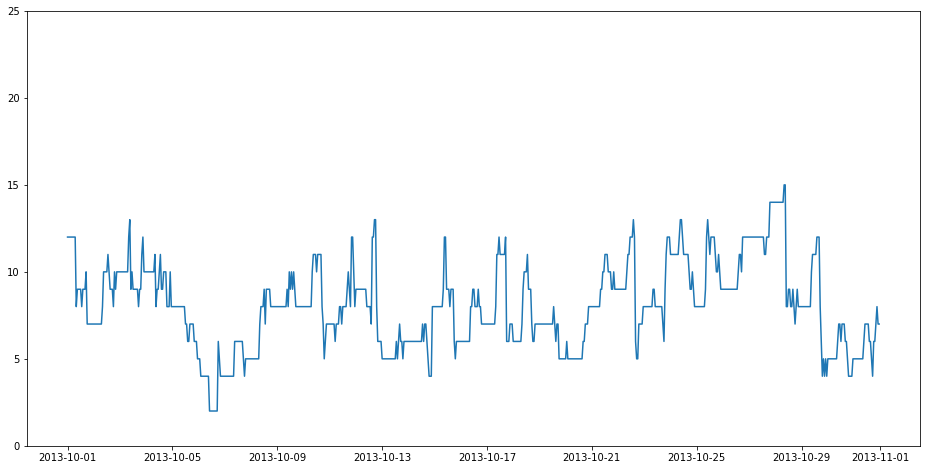

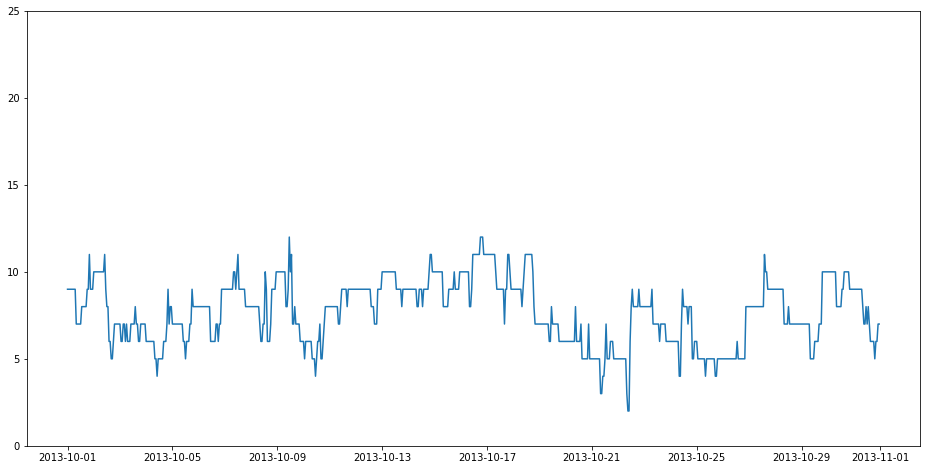

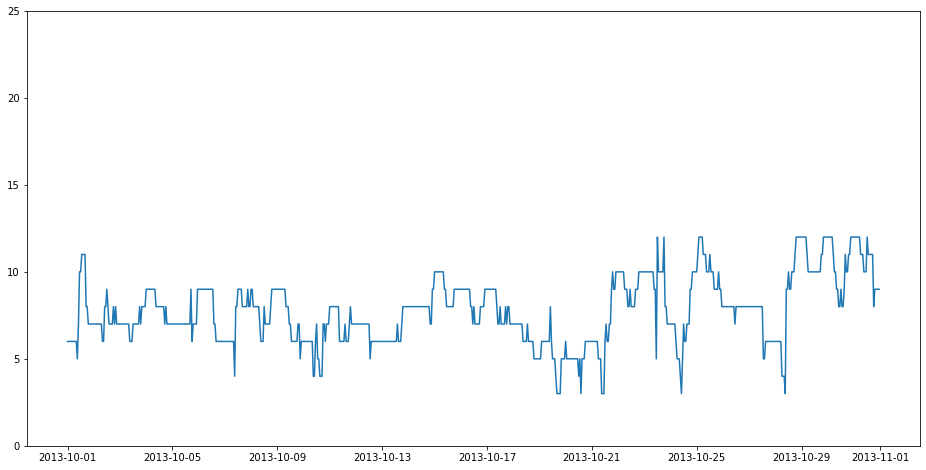

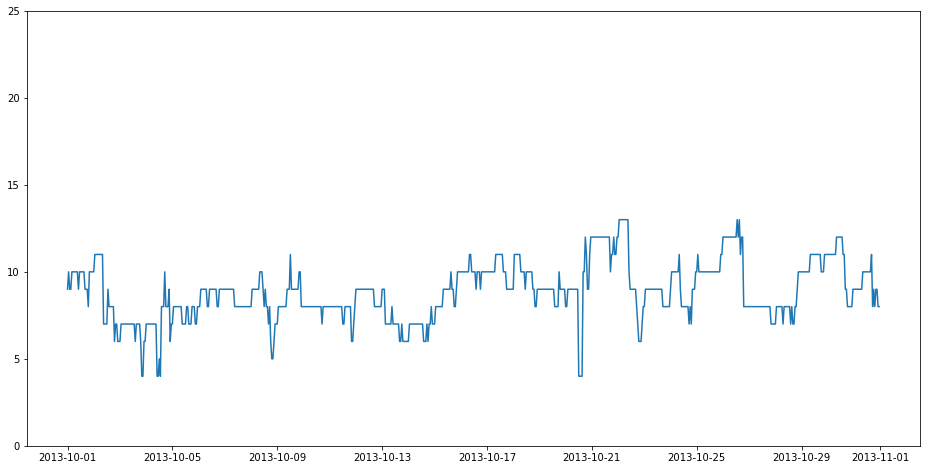

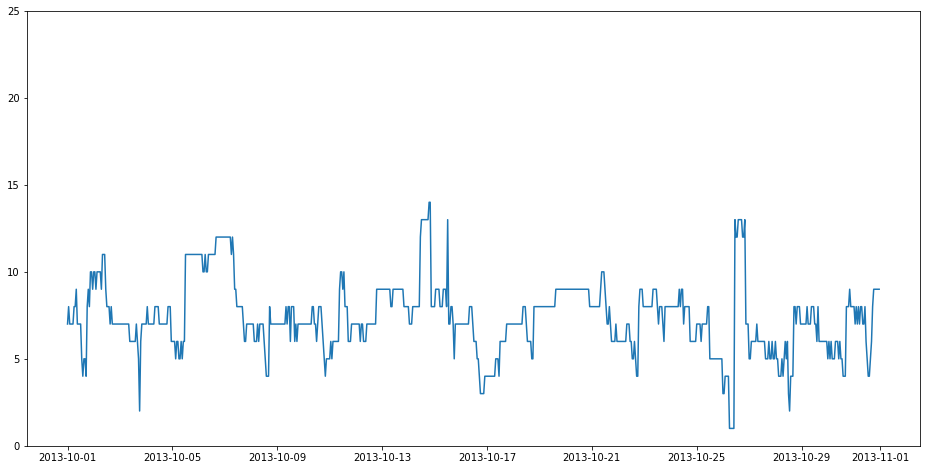

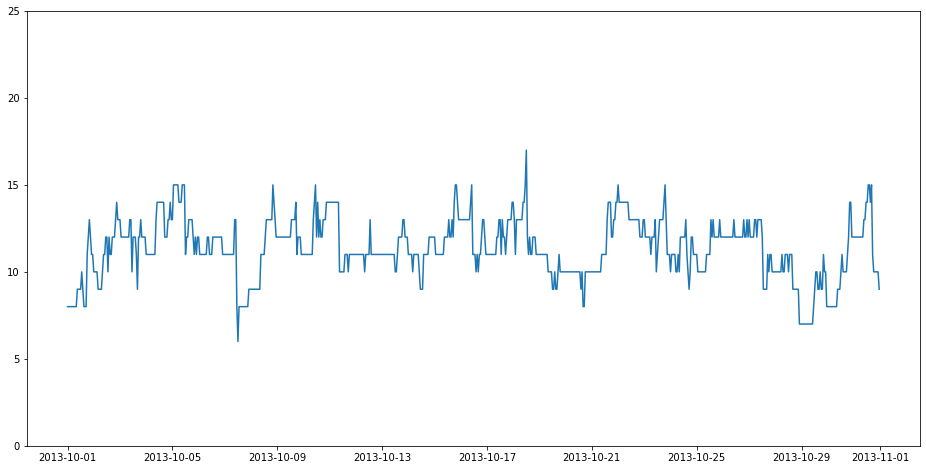

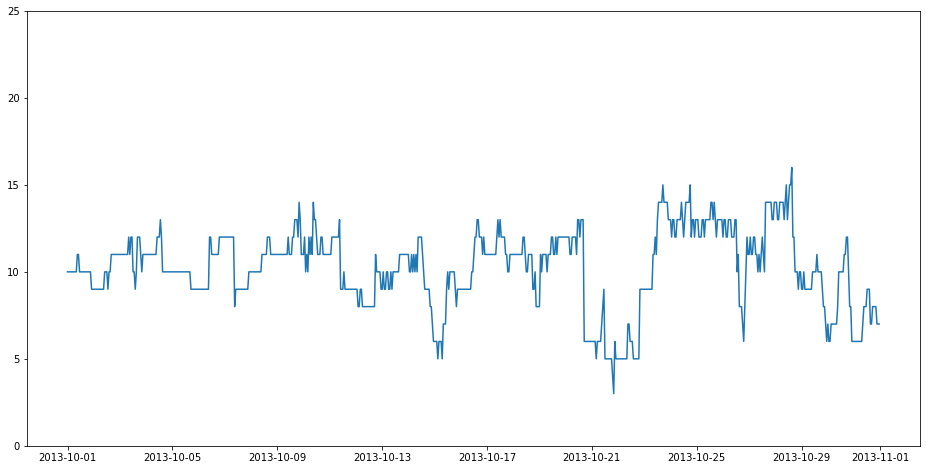

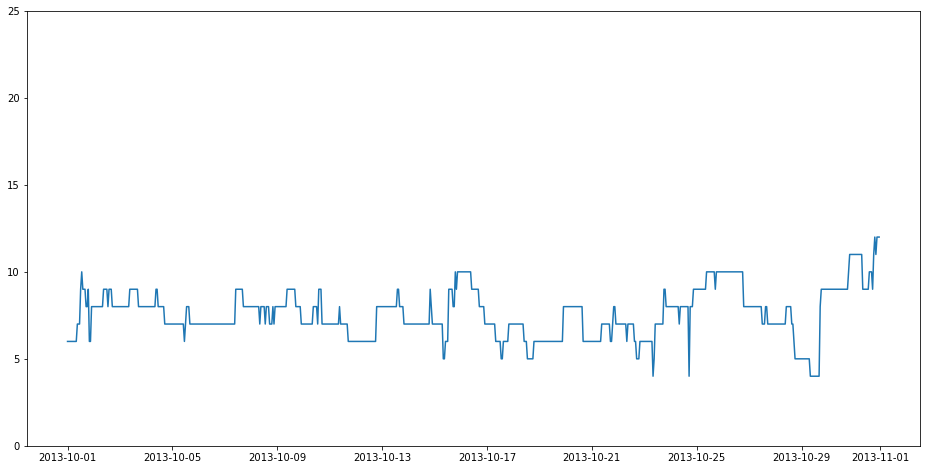

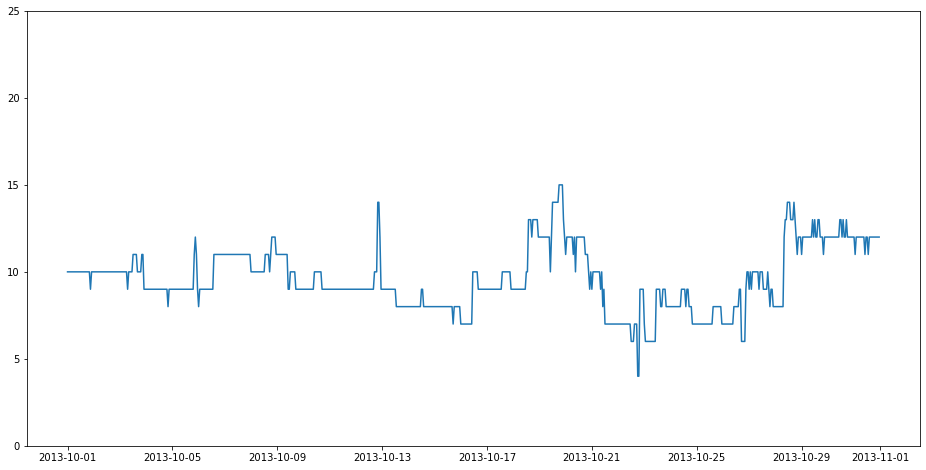

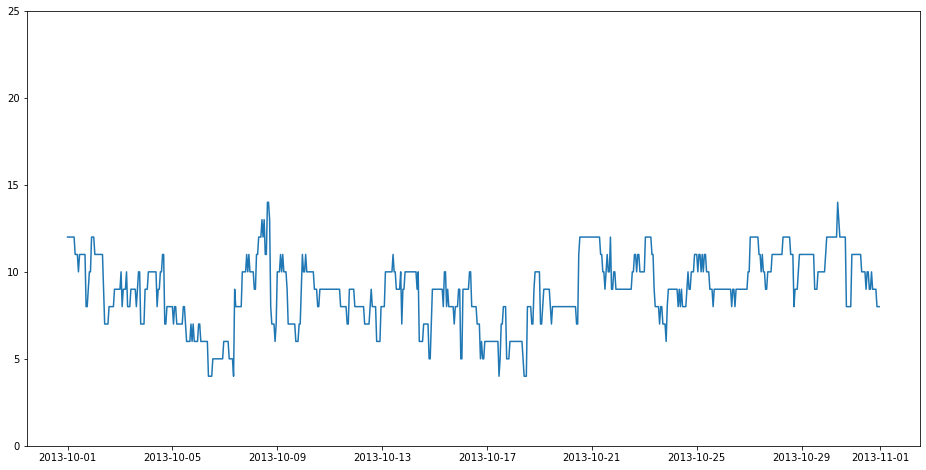

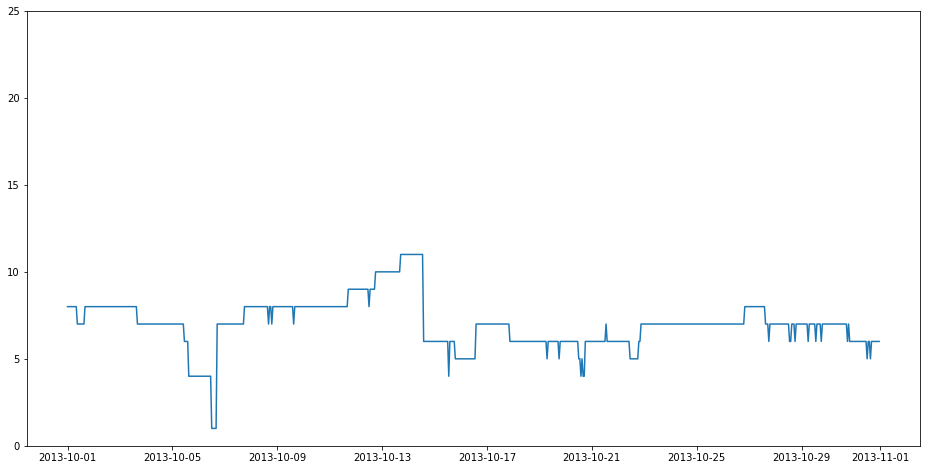

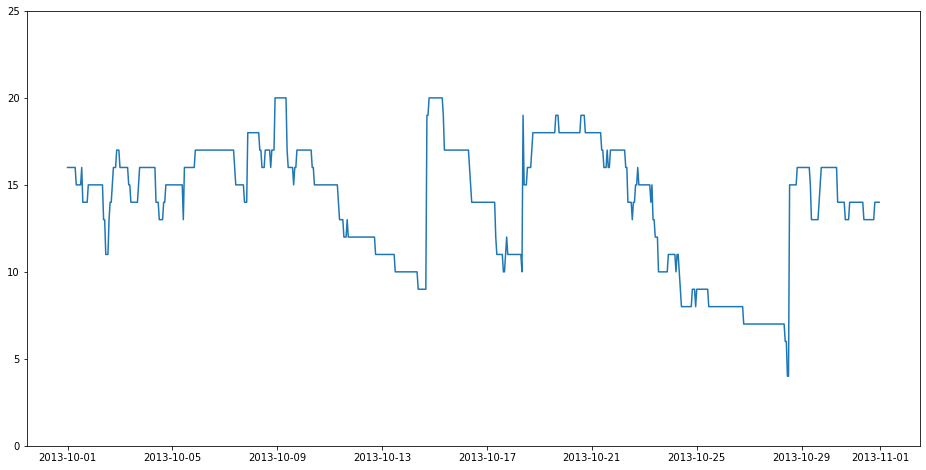

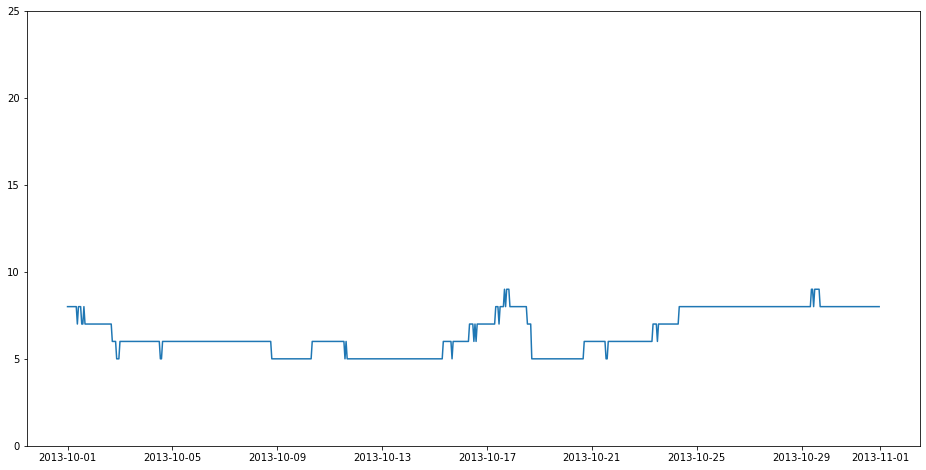

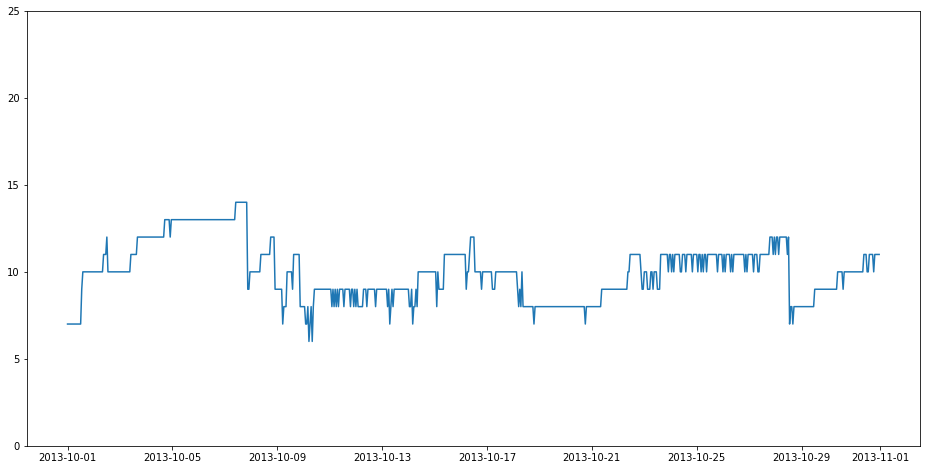

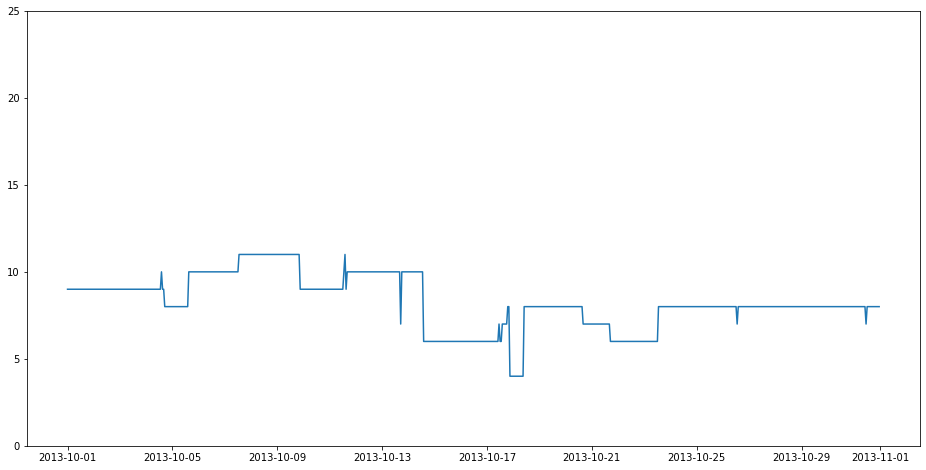

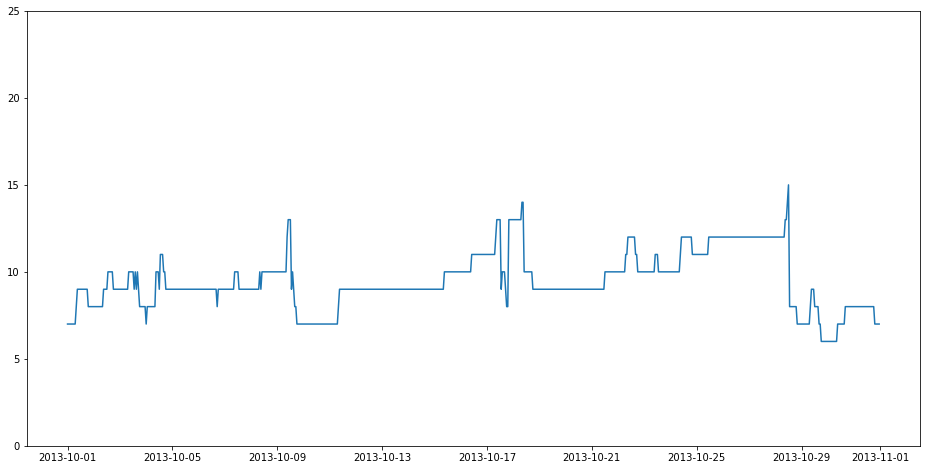

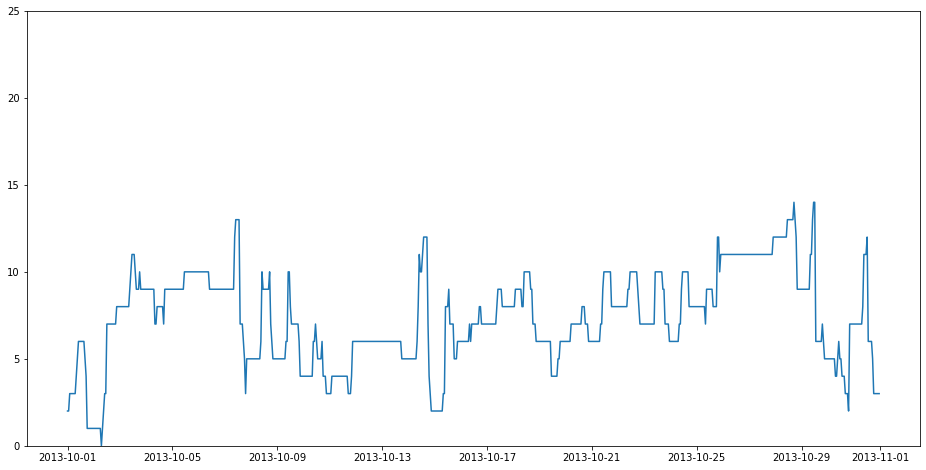

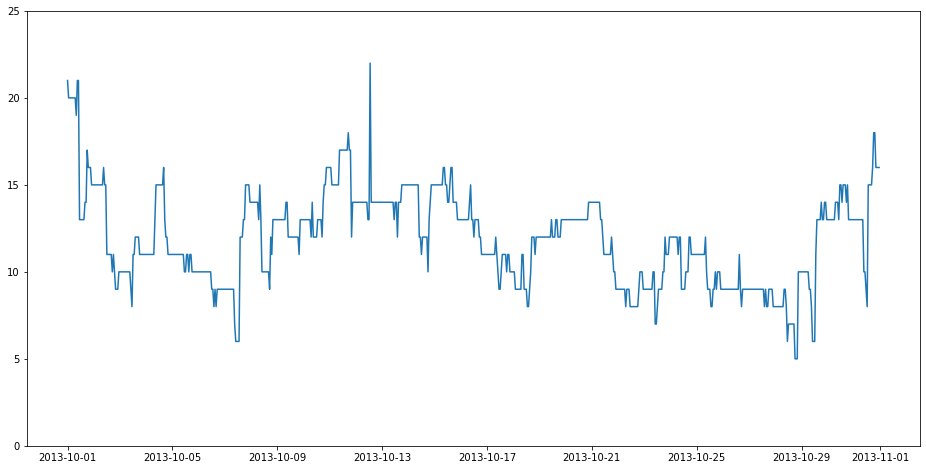

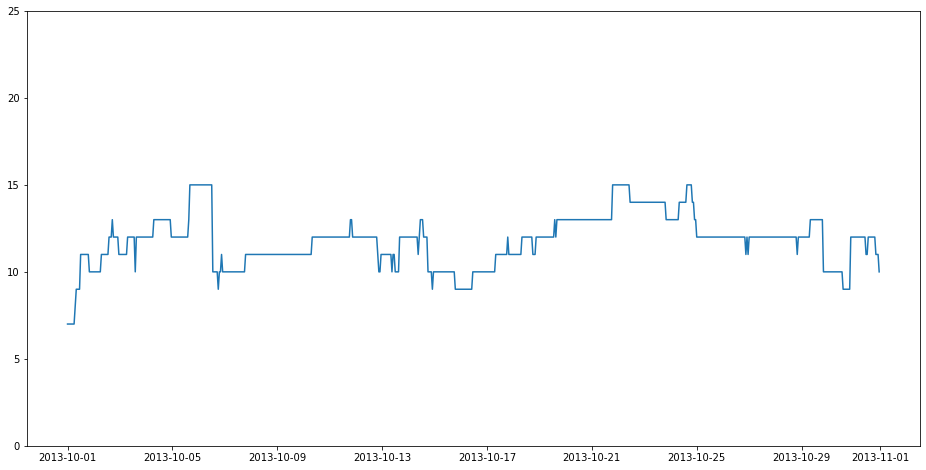

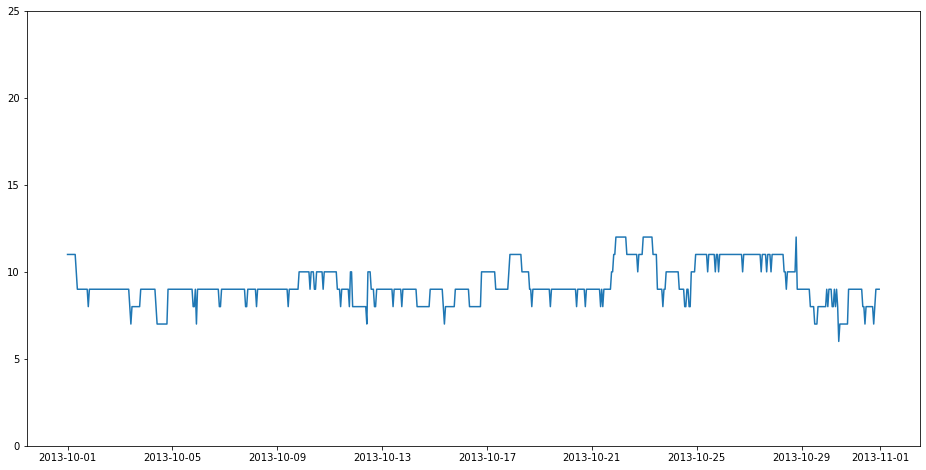

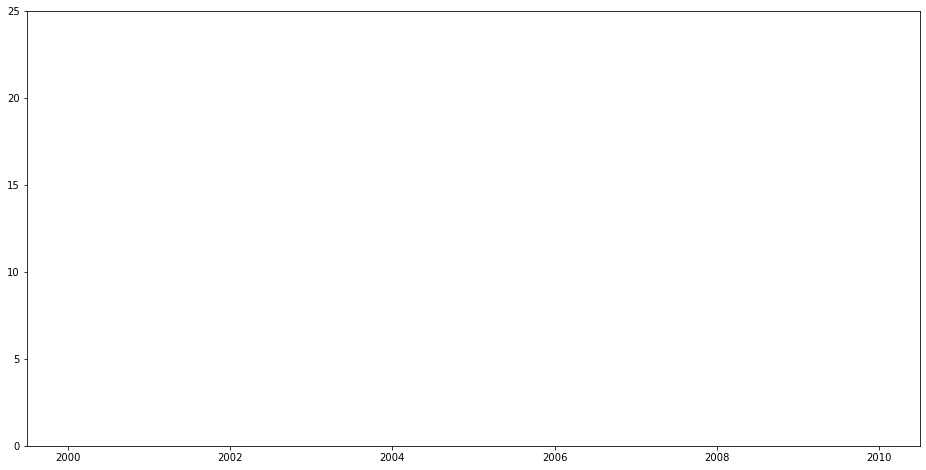

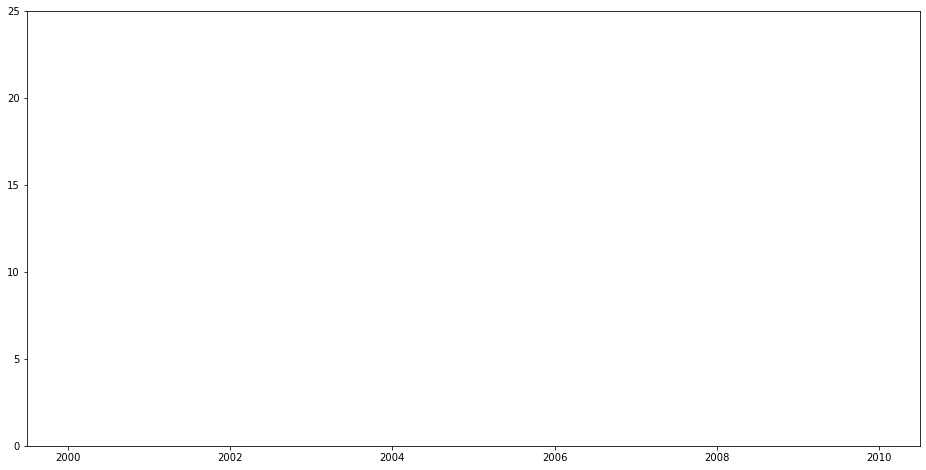

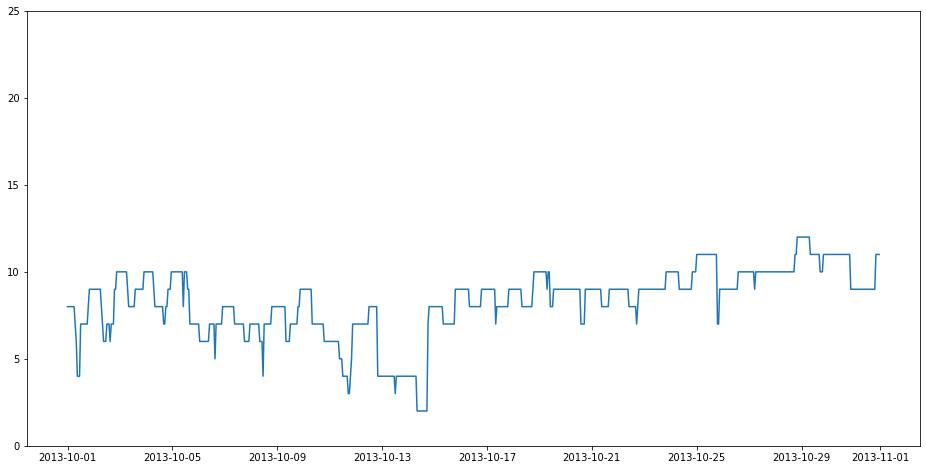

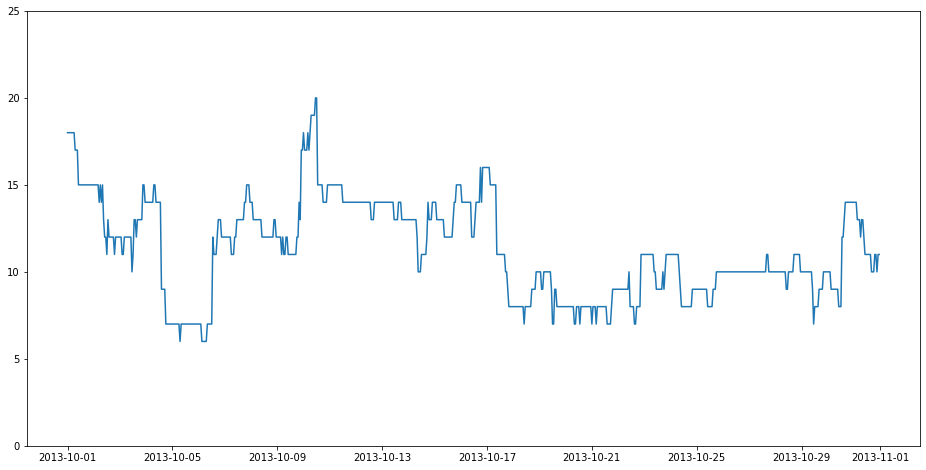

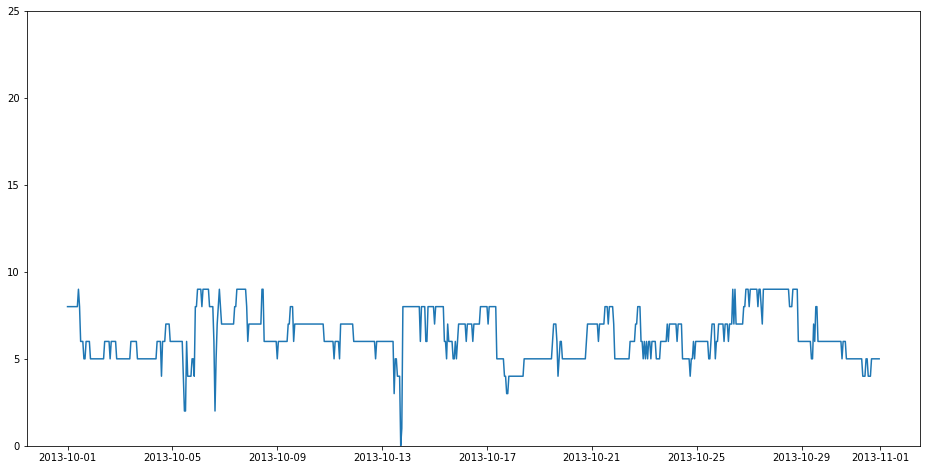

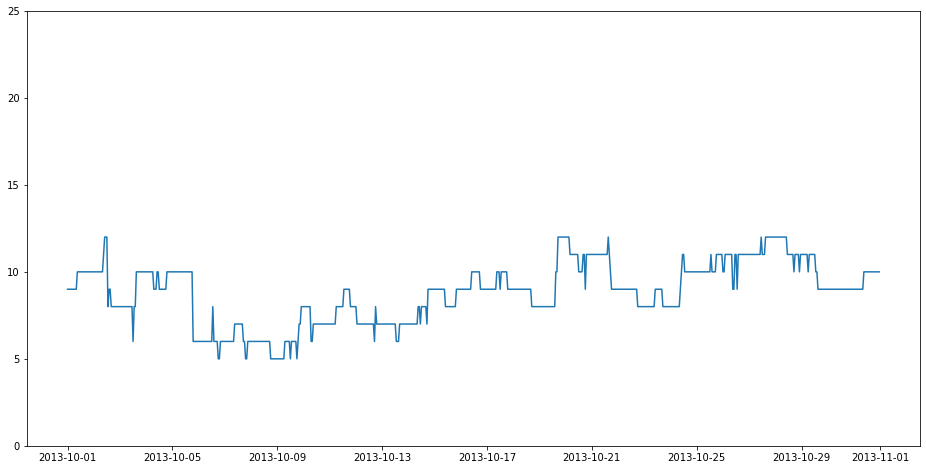

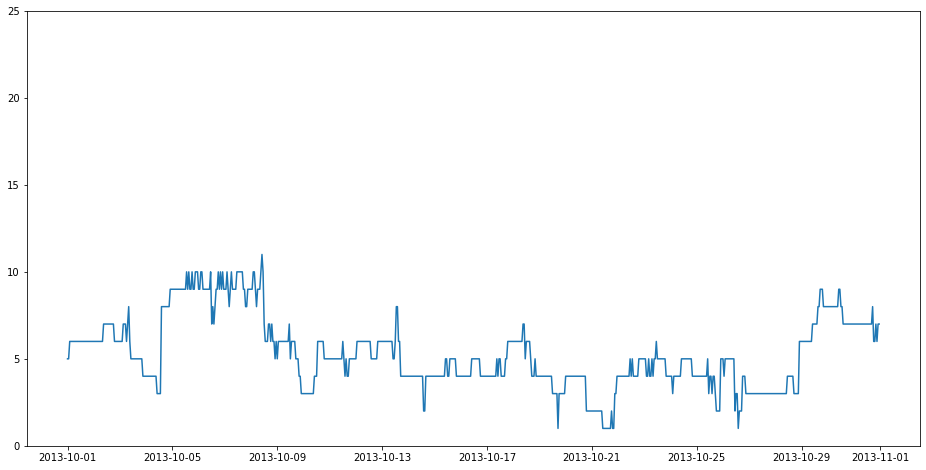

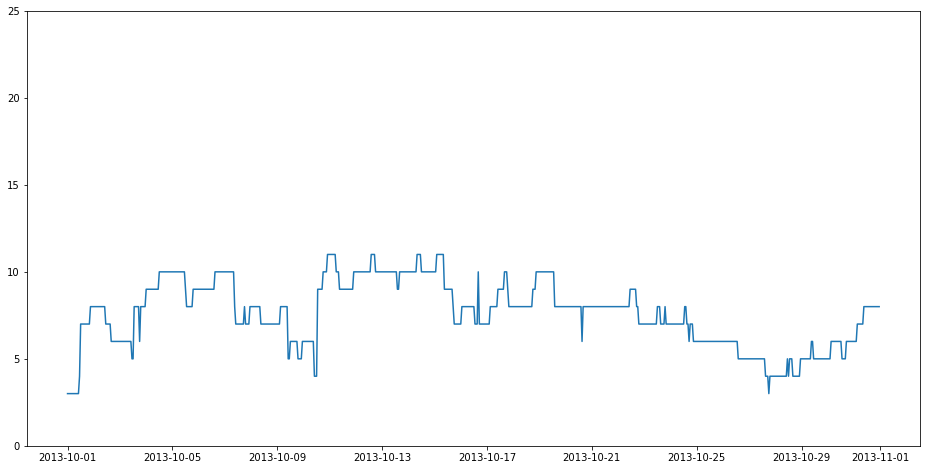

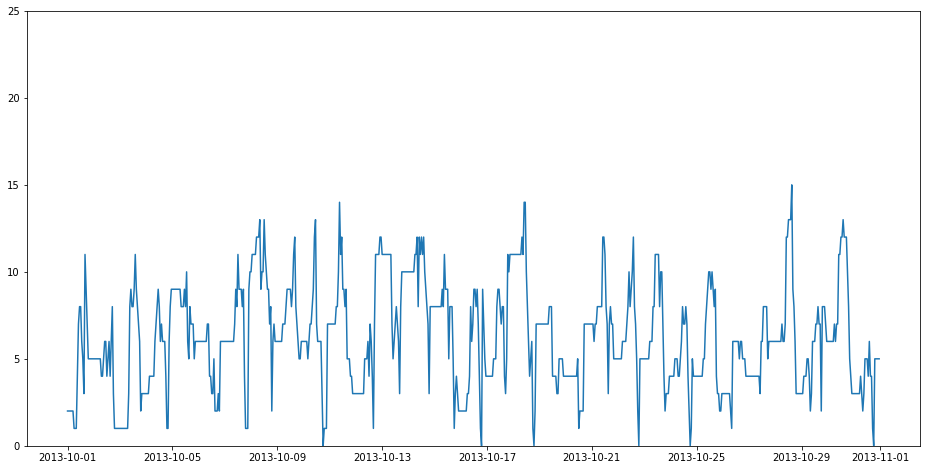

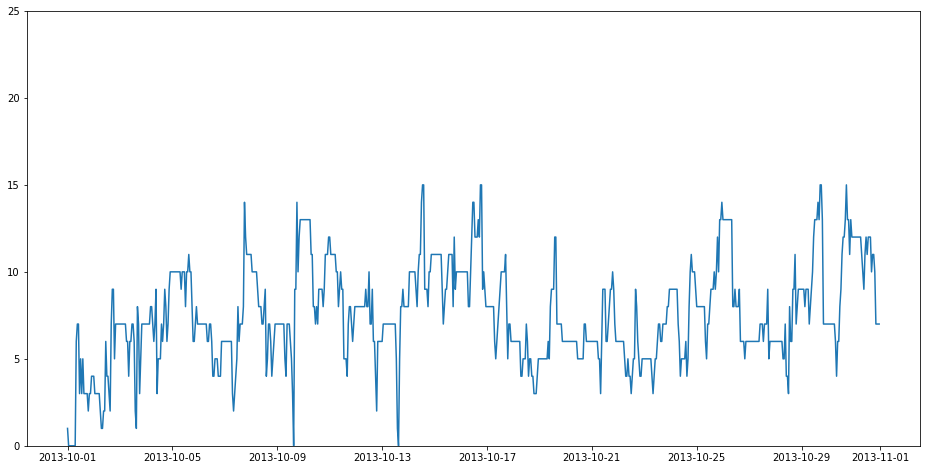

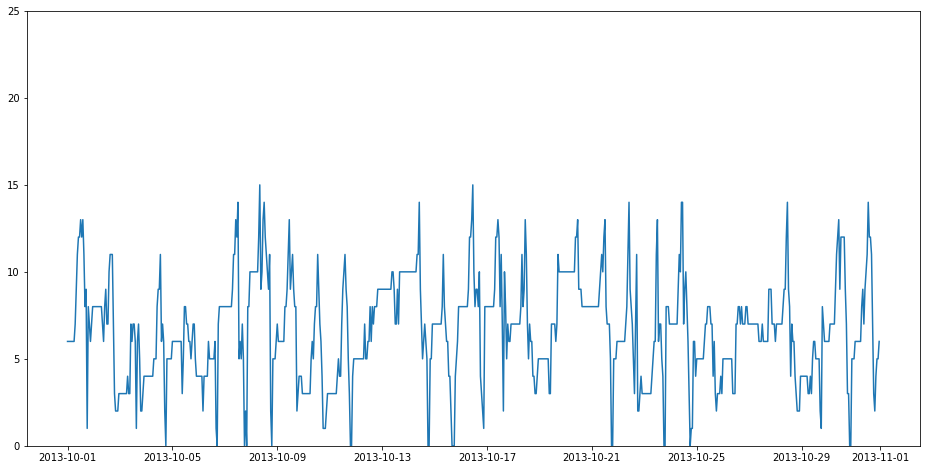

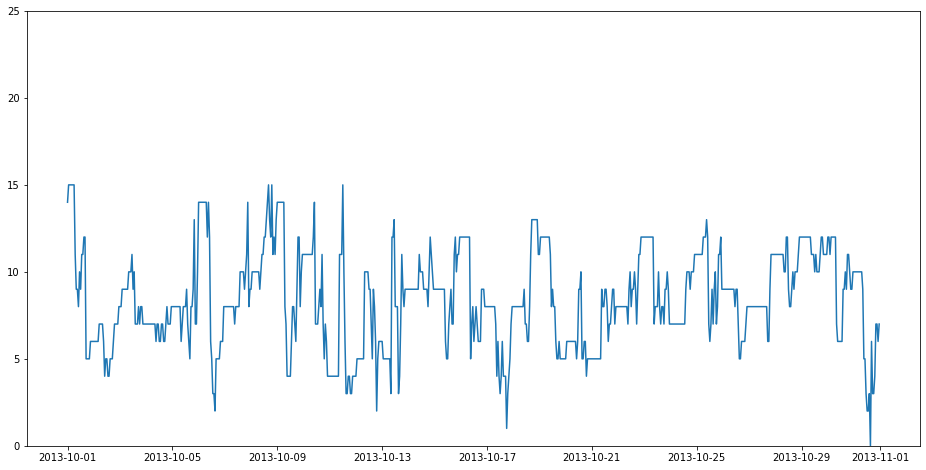

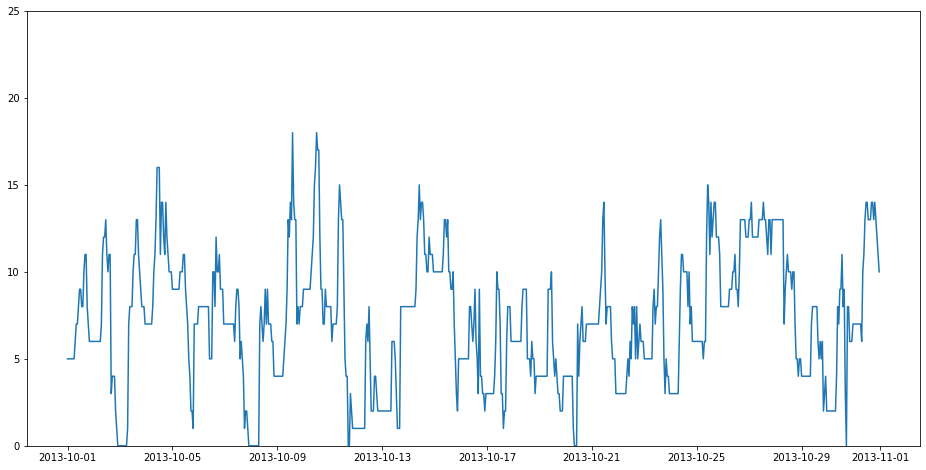

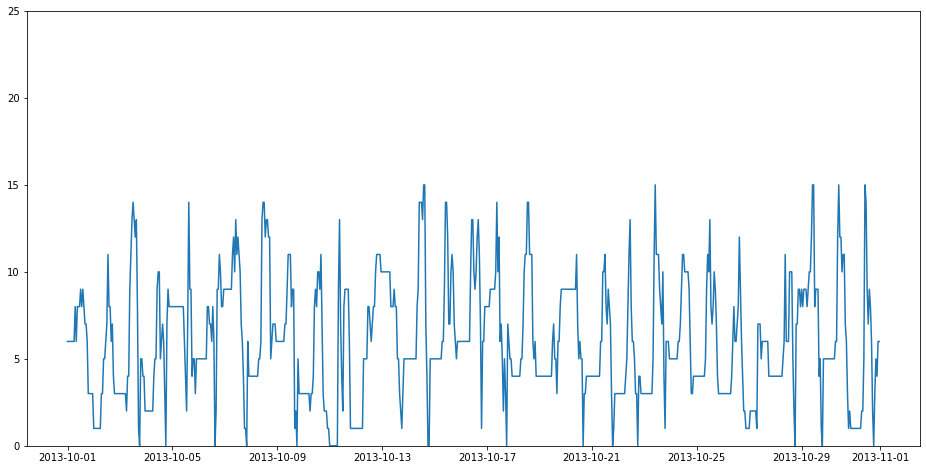

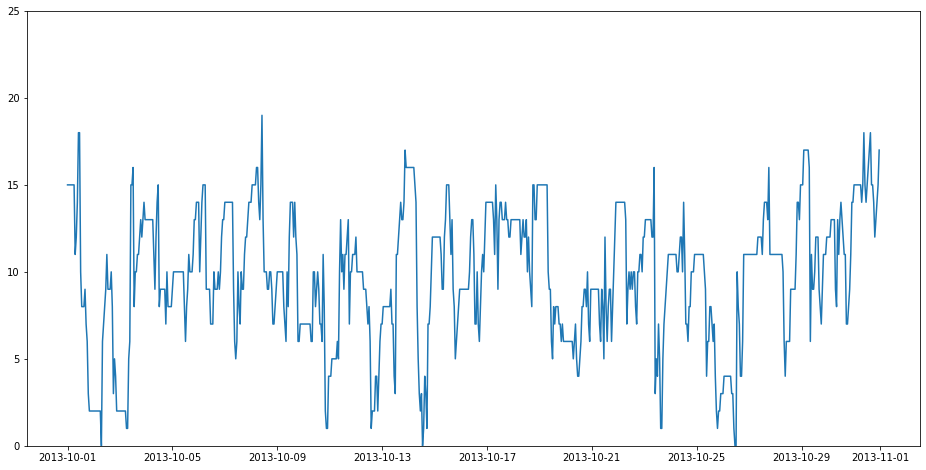

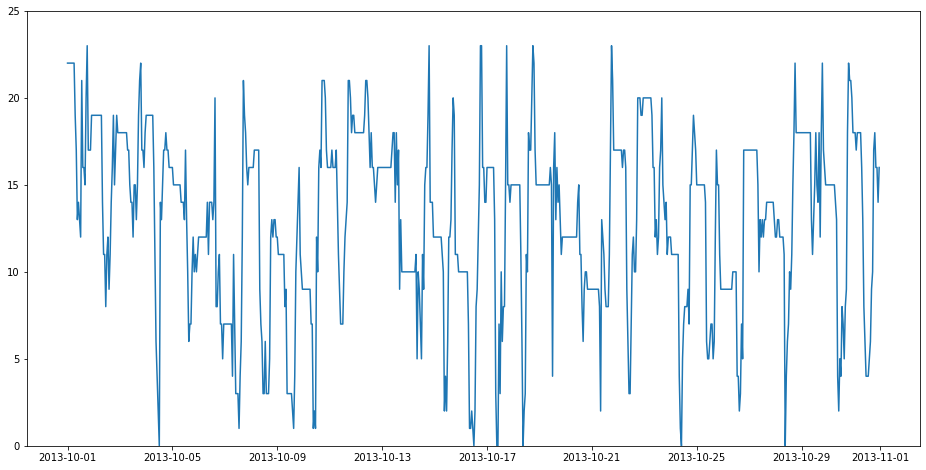

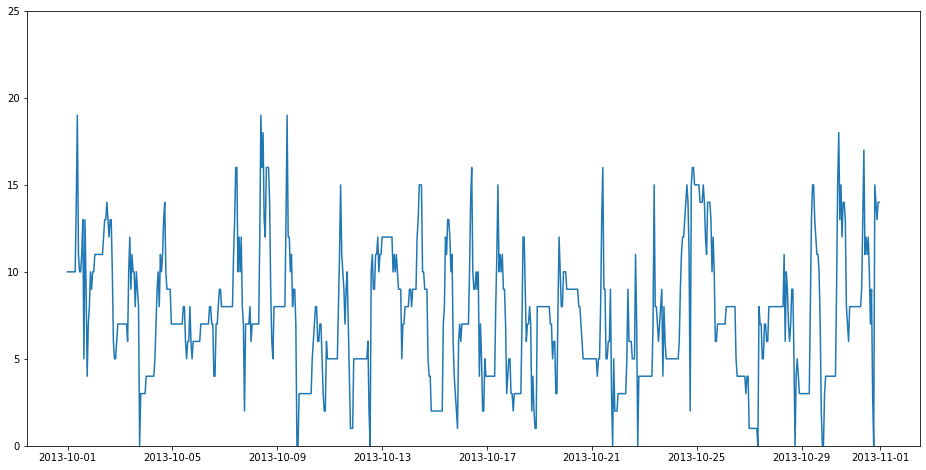

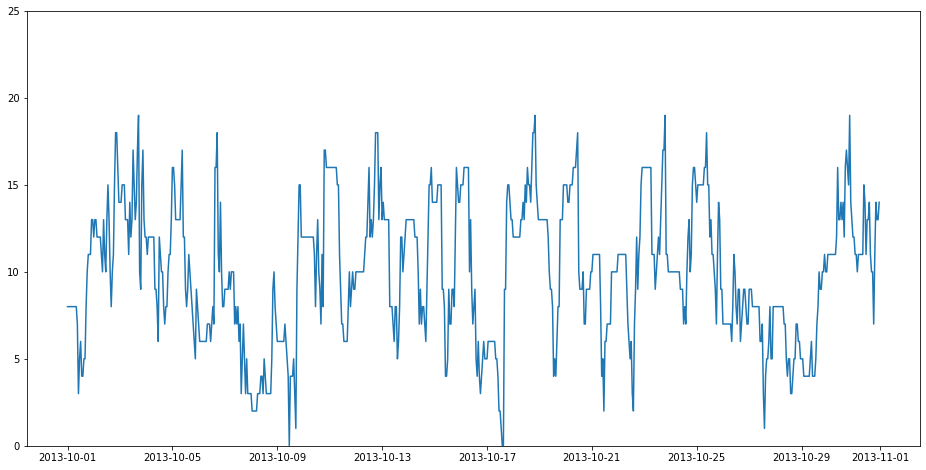

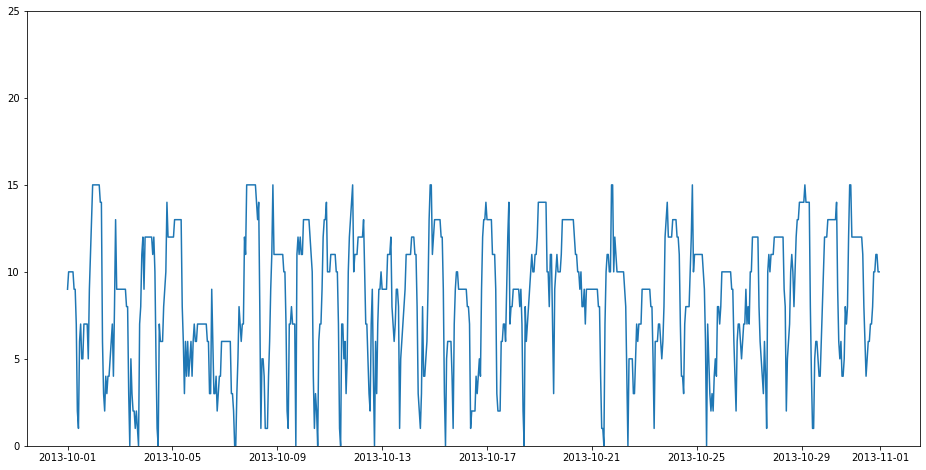

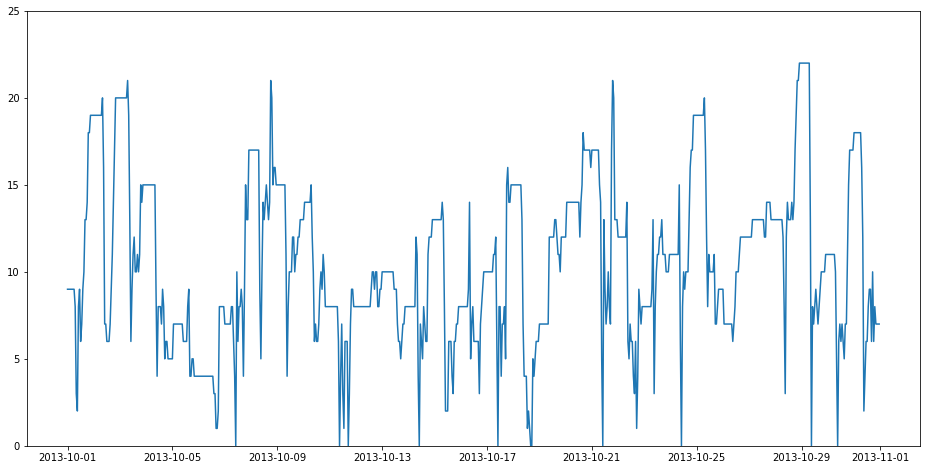

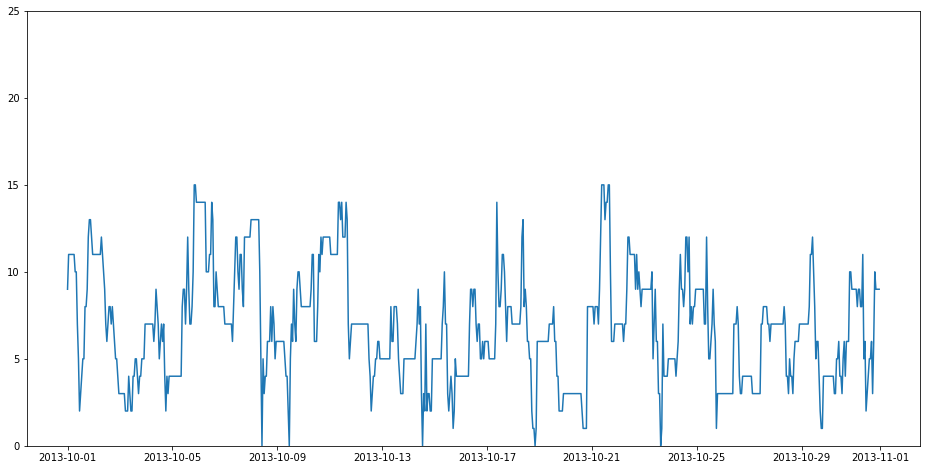

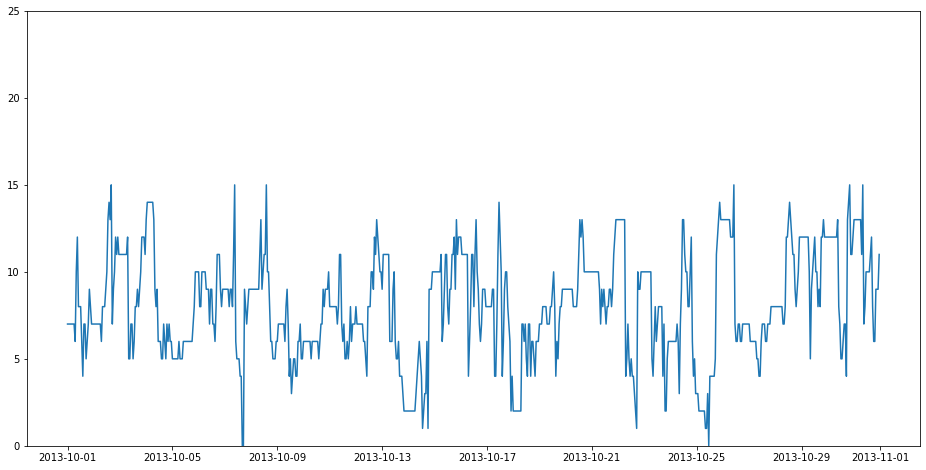

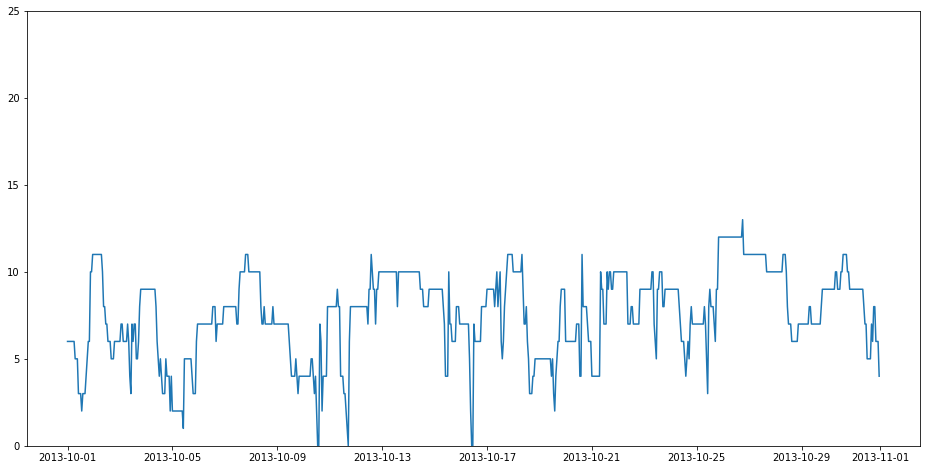

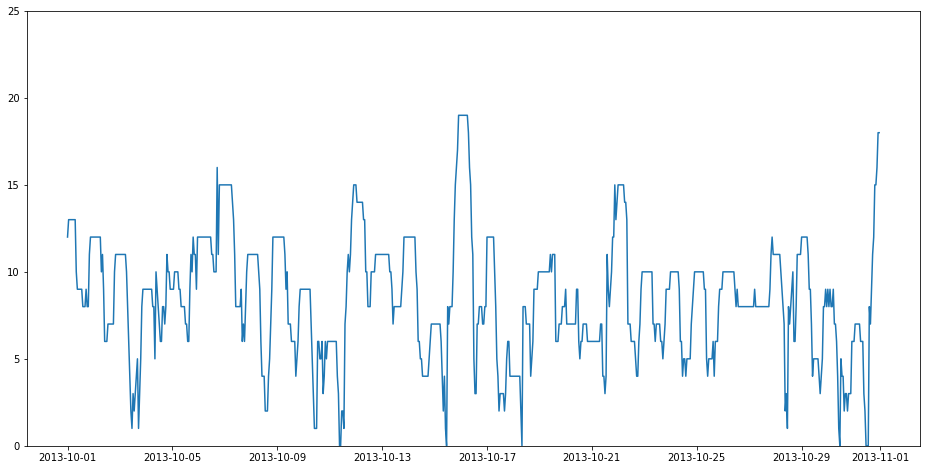

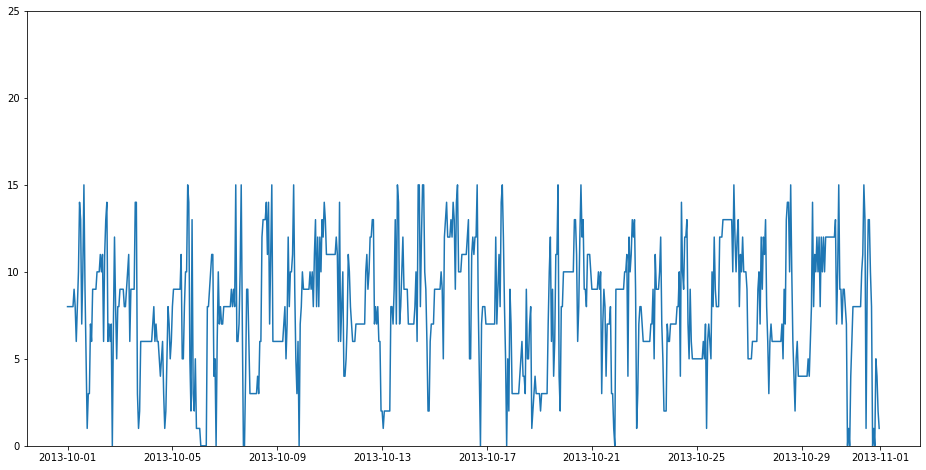

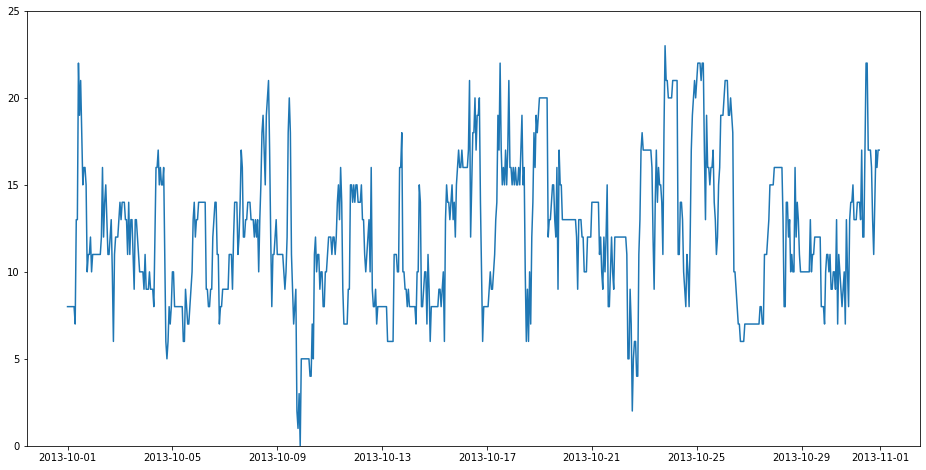

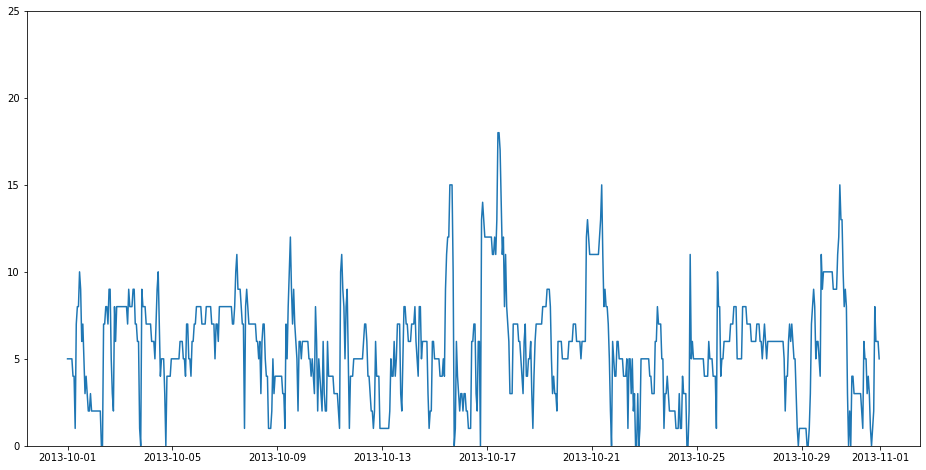

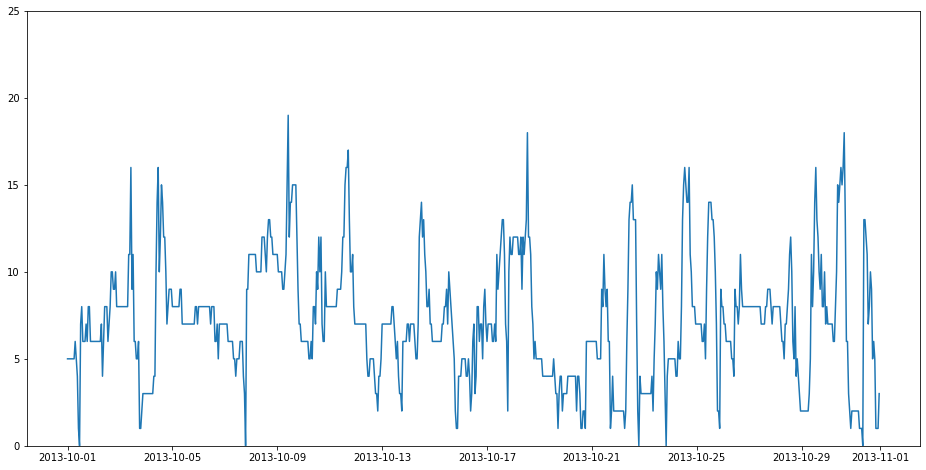

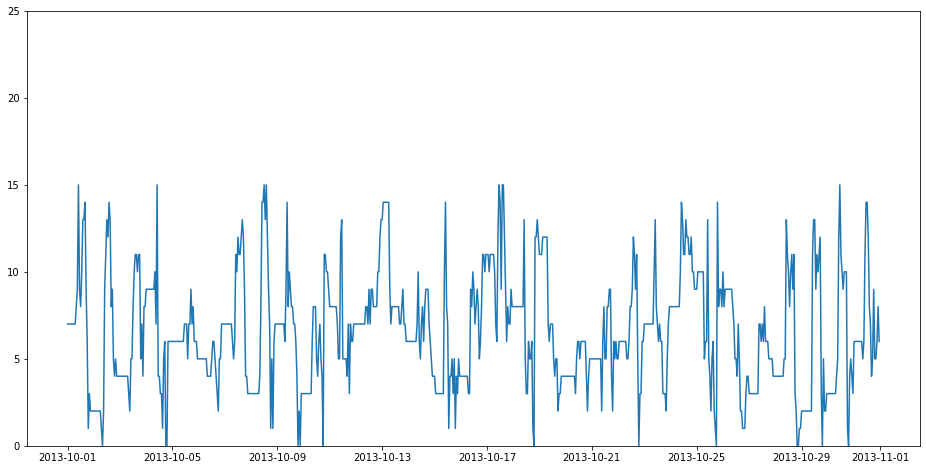

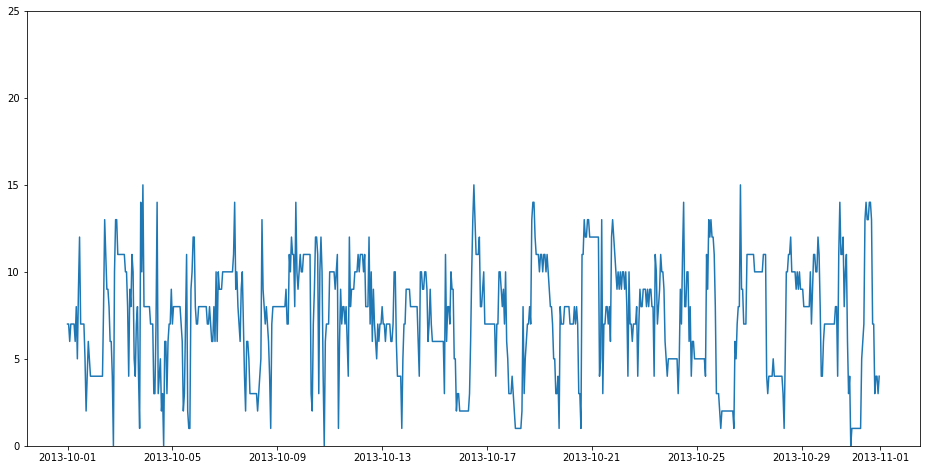

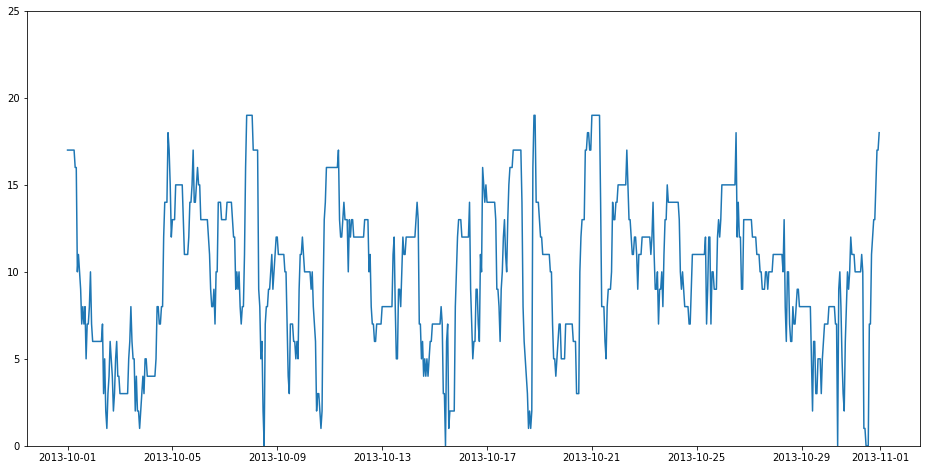

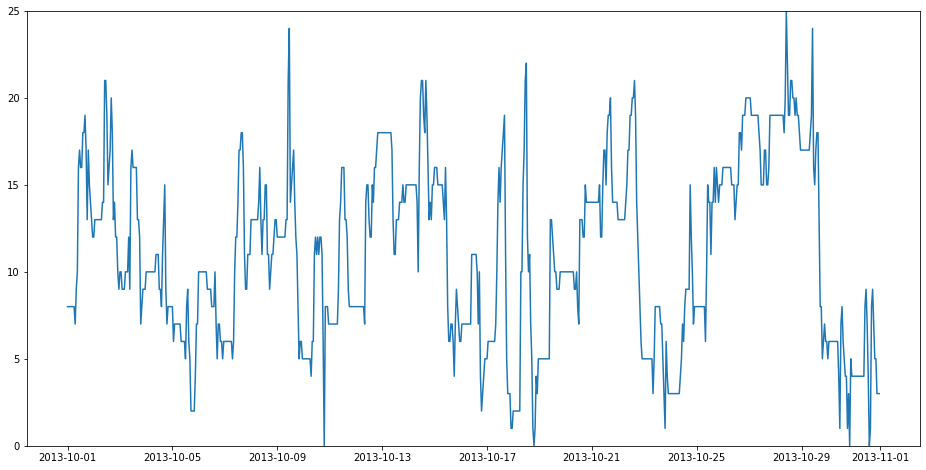

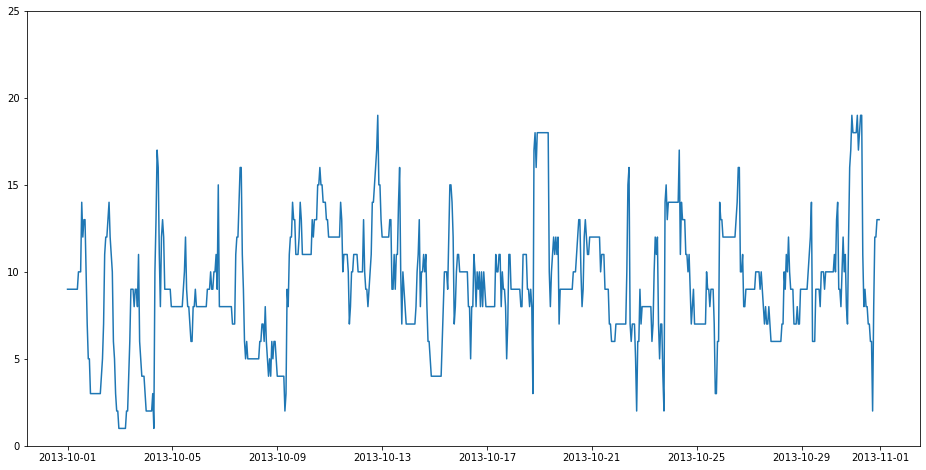

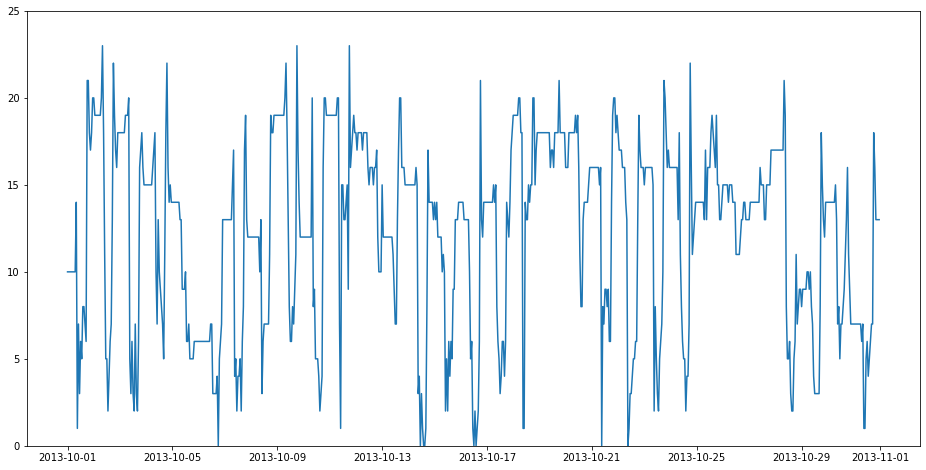

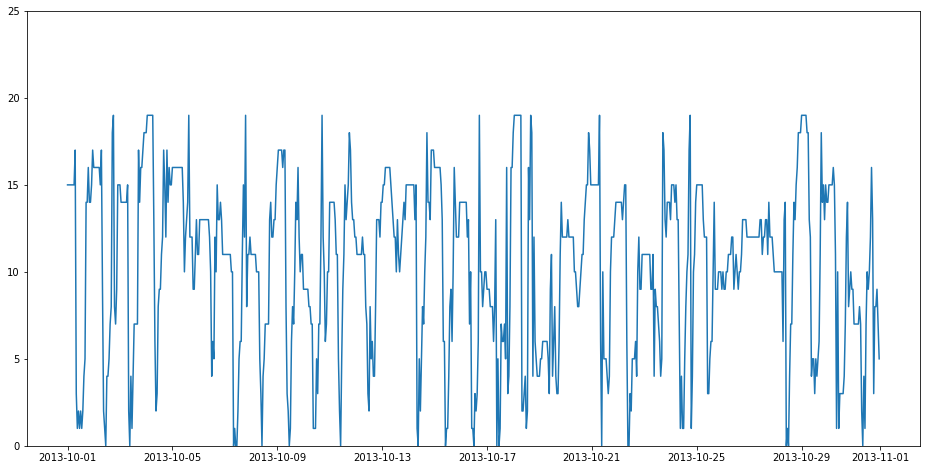

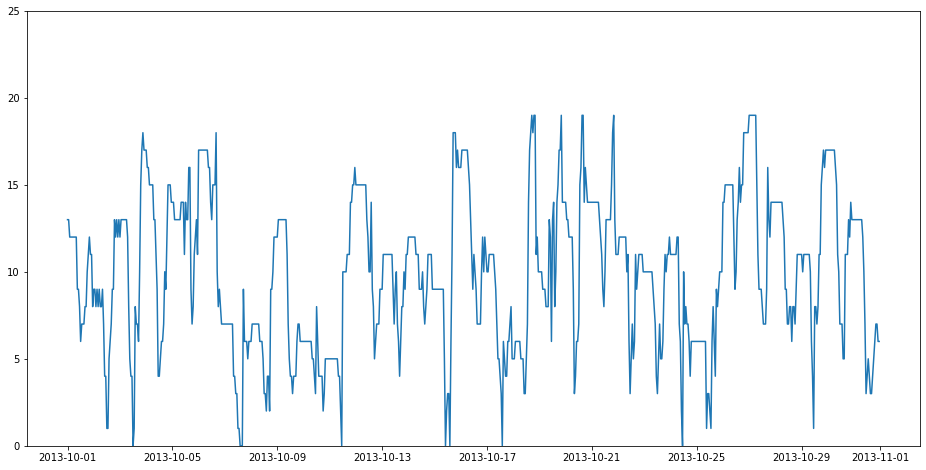

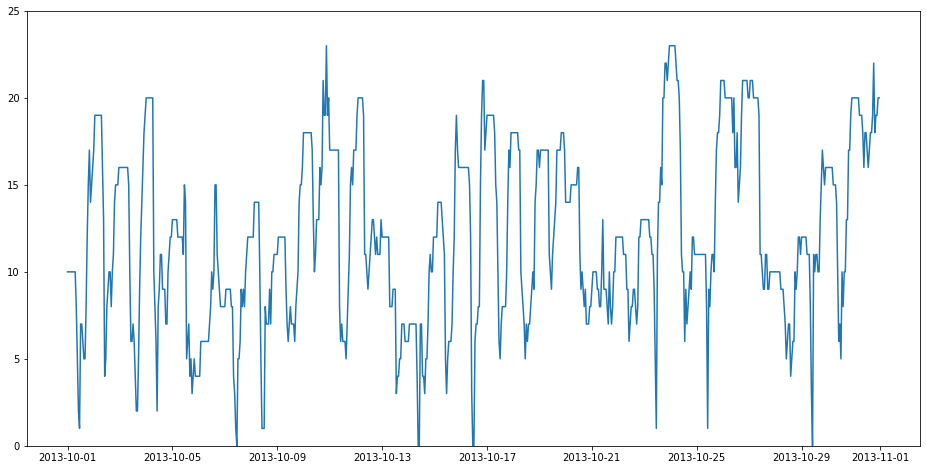

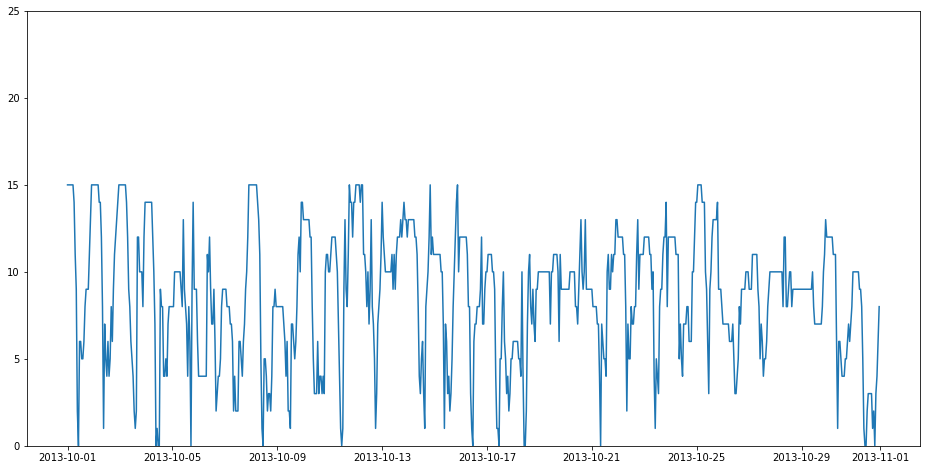

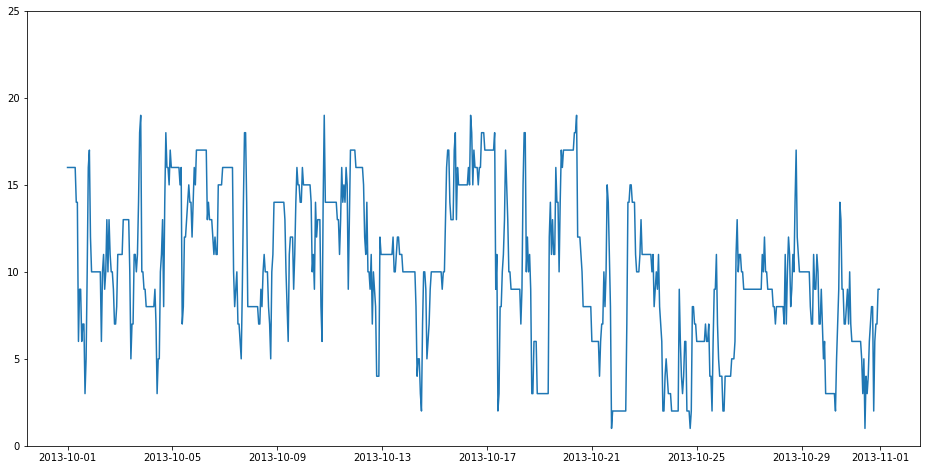

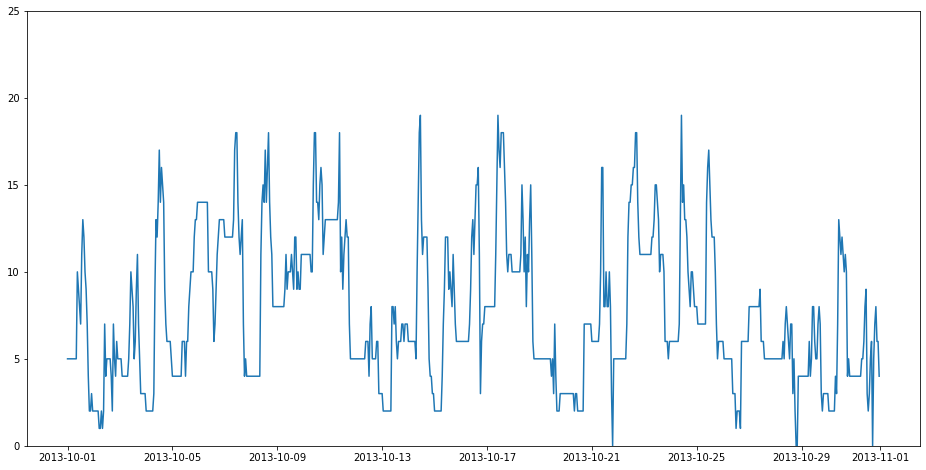

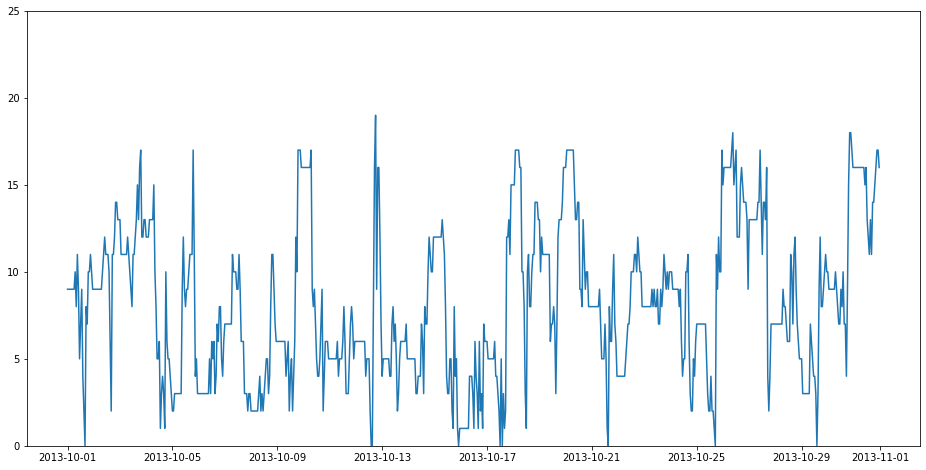

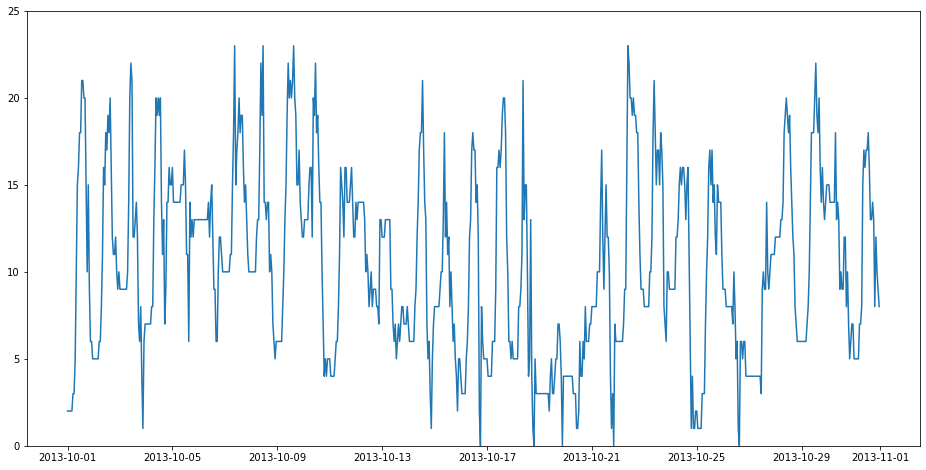

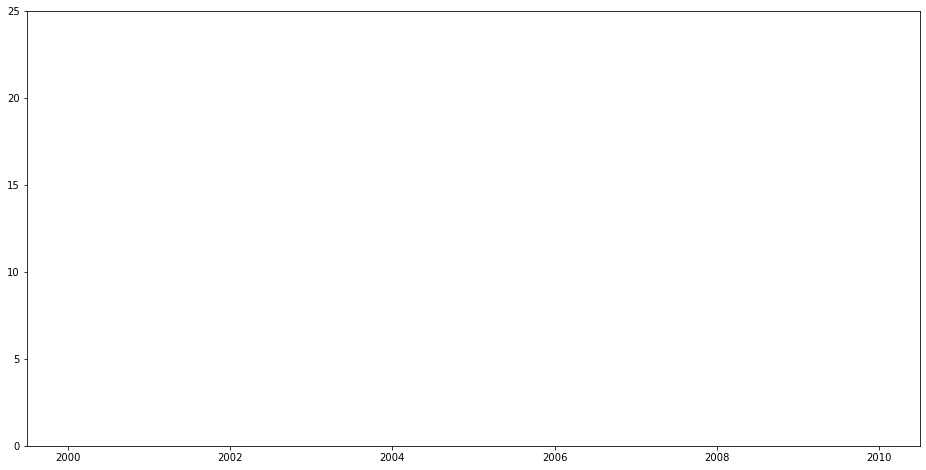

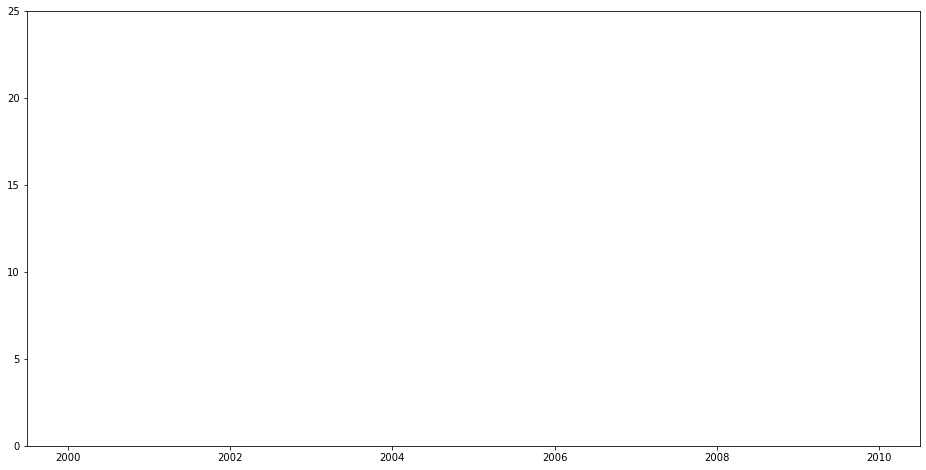

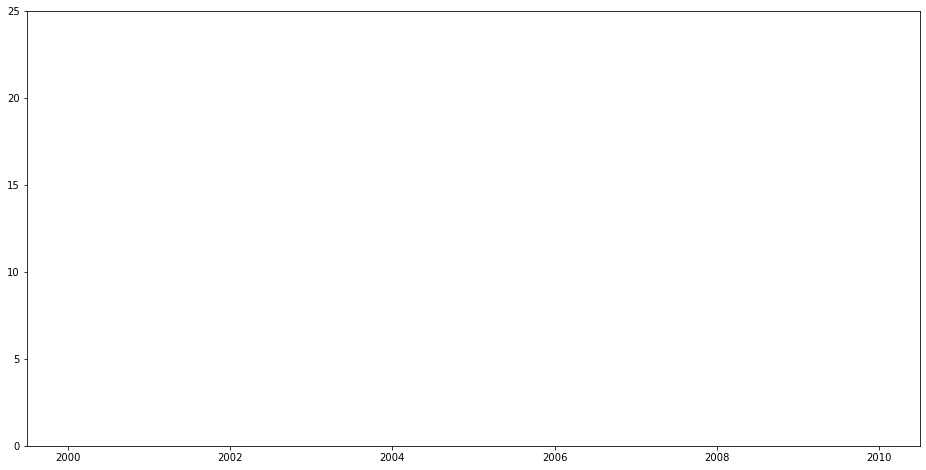

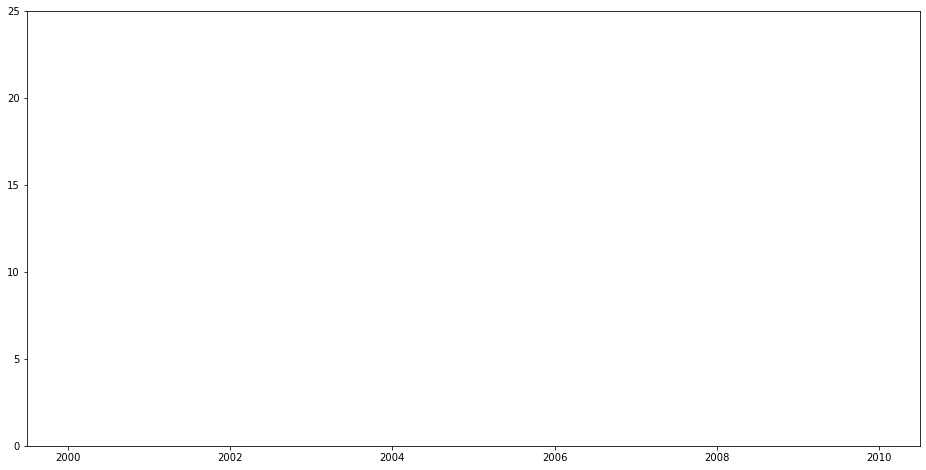

In [10]:
i=0
while i < 70:
    test_plot = train[train['station_id'] == i] 
    plt.figure(figsize=(16,8))
    plt.ylim(0, 25)
    plt.plot(test_plot['date'], test_plot['bikes_available'])
    i += 1

0
station番号
15.779569892473118
平均
11.396836423103109
分散


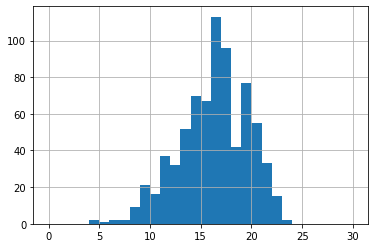

In [80]:
i=0
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

1
station番号
8.08736559139785
平均
3.3503650559342653
分散


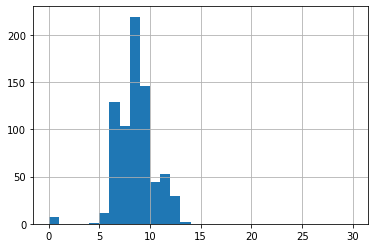

In [81]:
i=1
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

2
station番号
5.366935483870968
平均
2.0872498154821226
分散


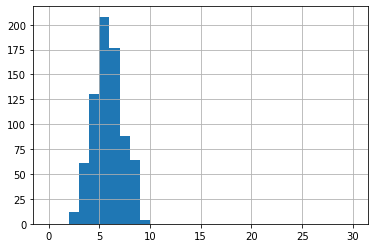

In [82]:
i=2
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

3
station番号
9.53494623655914
平均
2.5963545058539177
分散


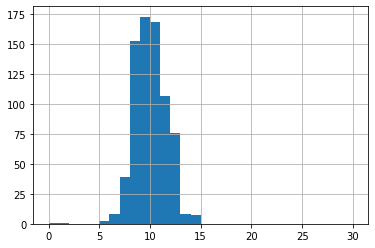

In [83]:
i=3
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

4
station番号
8.041666666666666
平均
5.999607447285806
分散


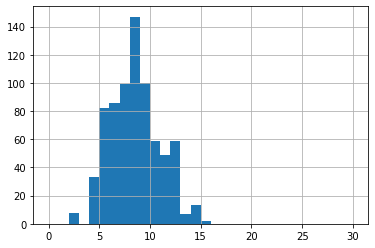

In [84]:
i=4
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

5
station番号
7.672043010752688
平均
3.3270235459268704
分散


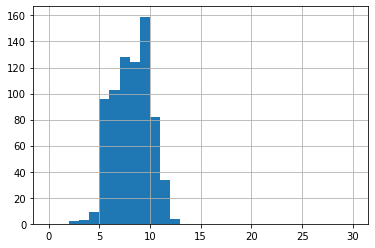

In [85]:
i=5
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

6
station番号
7.747311827956989
平均
3.6238151058625756
分散


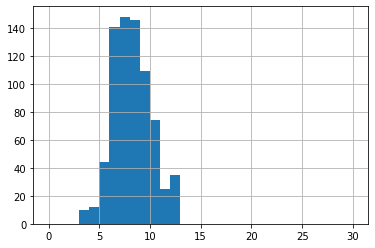

In [86]:
i=6
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

7
station番号
8.846774193548388
平均
2.7248078843398638
分散


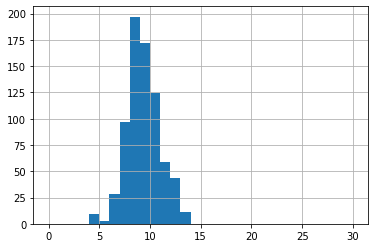

In [87]:
i=7
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

8
station番号
7.39247311827957
平均
4.252217832385434
分散


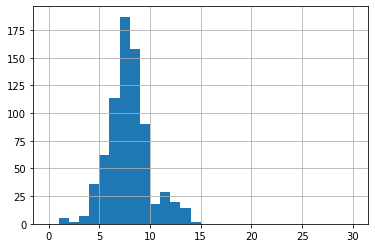

In [106]:
i=8
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

9
station番号
11.345430107526882
平均
2.9316614567504455
分散


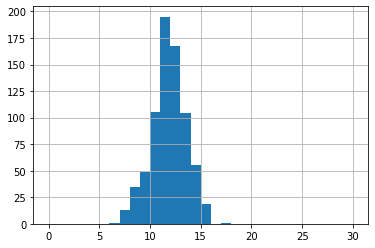

In [89]:
i=9
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

10
station番号
10.206989247311828
平均
4.944984732051118
分散


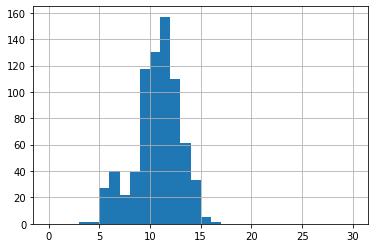

In [90]:
i=10
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

11
station番号
7.576612903225806
平均
1.9887389831980162
分散


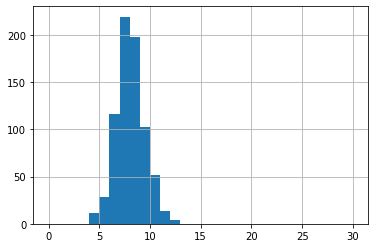

In [91]:
i=11
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

12
station番号
9.588709677419354
平均
3.28148743107714
分散


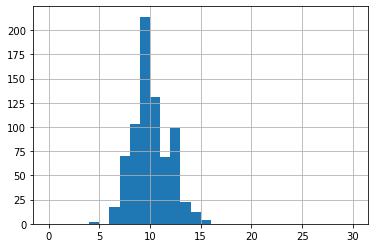

In [92]:
i=12
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

13
station番号
8.938172043010752
平均
3.796979695798777
分散


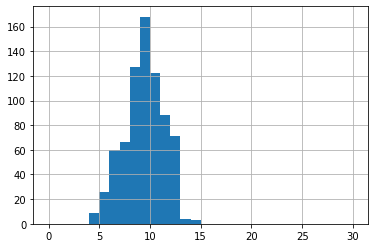

In [93]:
i=13
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

14
station番号
7.037634408602151
平均
2.0416503856784907
分散


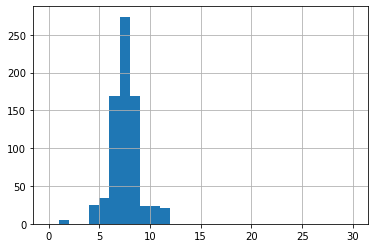

In [94]:
i=14
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

15
station番号
14.012096774193548
平均
12.302679850649044
分散


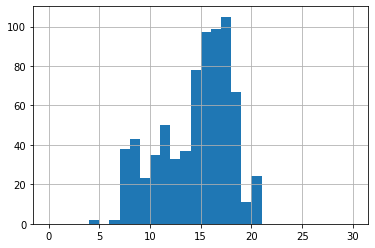

In [95]:
i=15
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

16
station番号
6.479838709677419
平均
1.404707376373028
分散


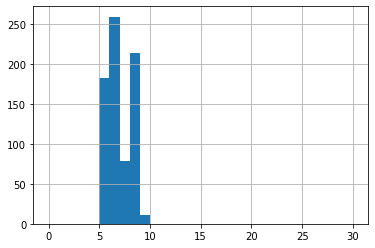

In [96]:
i=16
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

17
station番号
10.004032258064516
平均
2.6877360743281034
分散


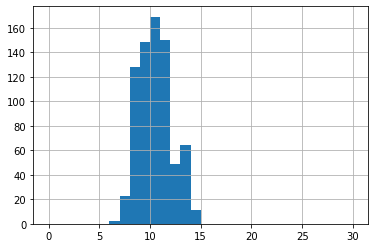

In [97]:
i=17
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

18
station番号
8.293010752688172
平均
2.3527909231681754
分散


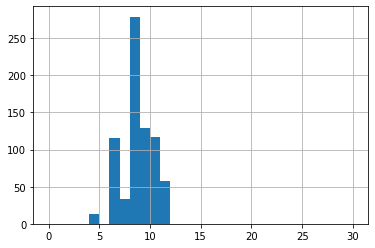

In [98]:
i=18
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

19
station番号
9.456989247311828
平均
2.587649604191081
分散


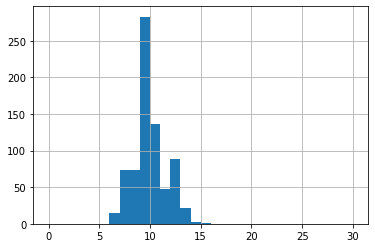

In [99]:
i=19
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

20
station番号
7.321236559139785
平均
7.06355916872892
分散


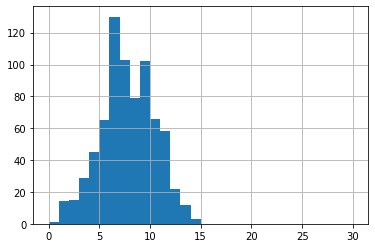

In [100]:
i=20
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

21
station番号
11.850806451612904
平均
7.166136630052551
分散


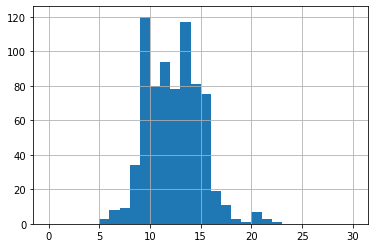

In [101]:
i=21
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

22
station番号
11.771505376344086
平均
2.2034399918956944
分散


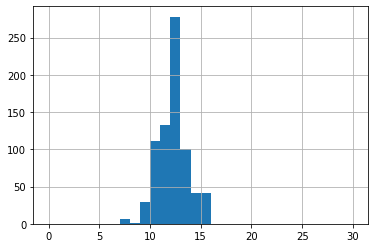

In [102]:
i=22
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

23
station番号
9.28763440860215
平均
1.1984471555304694
分散


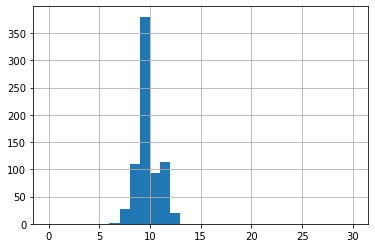

In [103]:
i=23
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

24
station番号
nan
平均
nan
分散


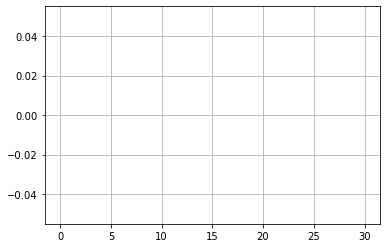

In [104]:
i=24
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

25
station番号
nan
平均
nan
分散


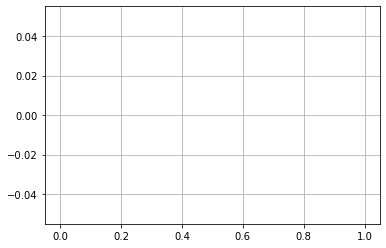

In [64]:
i=25
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist()
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

26
station番号
8.280913978494624
平均
3.7985046816885766
分散


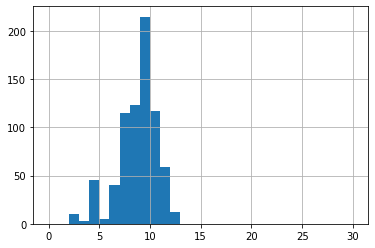

In [107]:
i =26
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

27
station番号
11.275537634408602
平均
7.782657853225103
分散


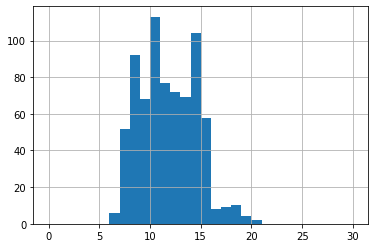

In [108]:
i=27
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

28
station番号
6.344086021505376
平均
1.9945006440035193
分散


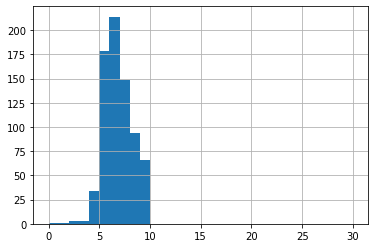

In [109]:
i=28
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

29
station番号
8.80241935483871
平均
3.0497384187904206
分散


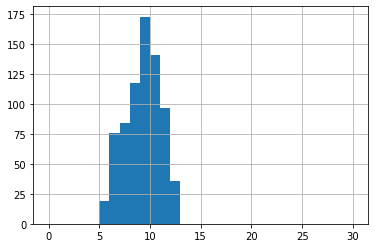

In [110]:
i=29
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

30
station番号
5.317204301075269
平均
4.189959333709596
分散


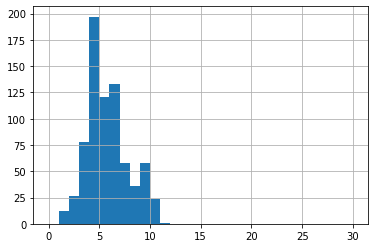

In [111]:
i=30
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

31
station番号
7.615591397849462
平均
3.55593423927986
分散


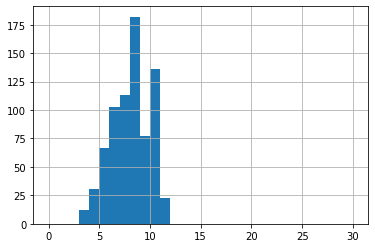

In [112]:
i=31
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

32
station番号
6.245967741935484
平均
8.791369990882693
分散


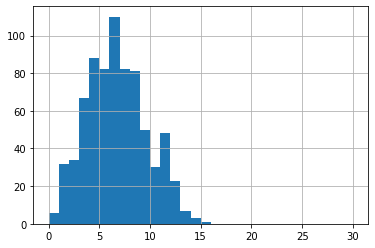

In [113]:
i=32
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

33
station番号
7.548387096774194
平均
8.108018929362233
分散


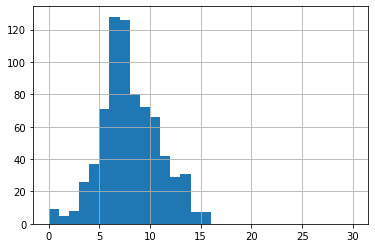

In [114]:
i=33
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

34
station番号
6.670698924731183
平均
8.702989551223633
分散


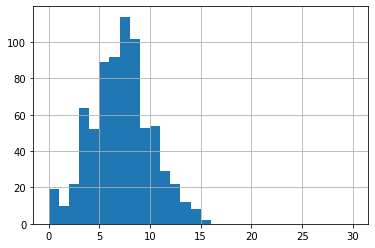

In [115]:
i=34
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

35
station番号
8.416666666666666
平均
7.500448631673377
分散


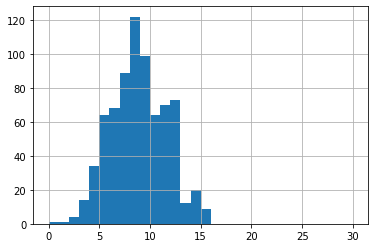

In [116]:
i=35
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

36
station番号
7.205645161290323
平均
14.026293795858184
分散


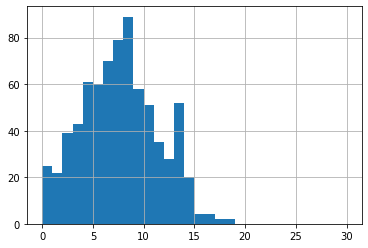

In [117]:
i=36
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

37
station番号
6.06989247311828
平均
11.583264591383362
分散


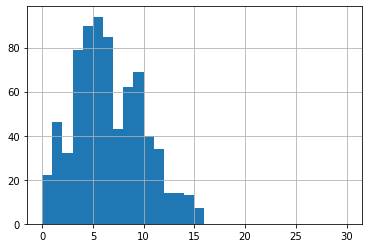

In [118]:
i=37
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

38
station番号
9.775537634408602
平均
14.653451931286948
分散


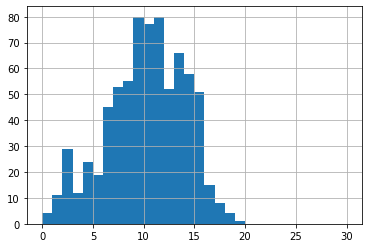

In [119]:
i=38
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

39
station番号
12.91263440860215
平均
25.75951714207149
分散


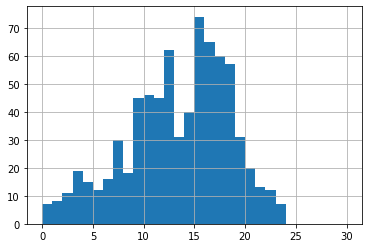

In [120]:
i=39
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

40
station番号
7.509408602150538
平均
13.563841372523461
分散


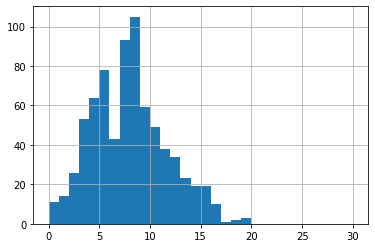

In [121]:
i = 40
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

41
station番号
10.03763440860215
平均
15.60827218917783
分散


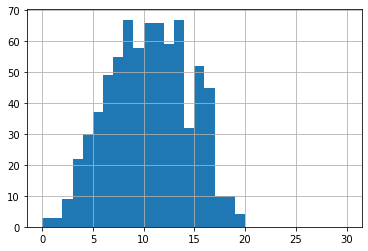

In [122]:
i = 41
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

42
station番号
8.53763440860215
平均
14.038958595638137
分散


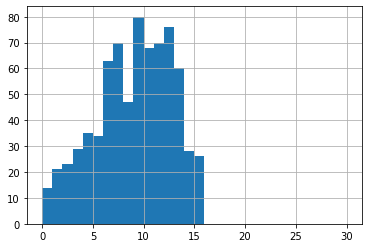

In [123]:
i = 42
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

43
station番号
10.40994623655914
平均
22.040331625638572
分散


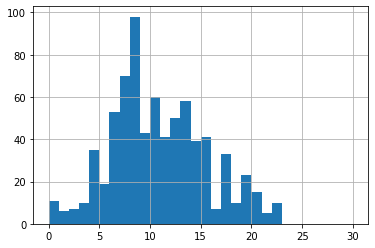

In [124]:
i = 43
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

44
station番号
6.827956989247312
平均
9.894991244446356
分散


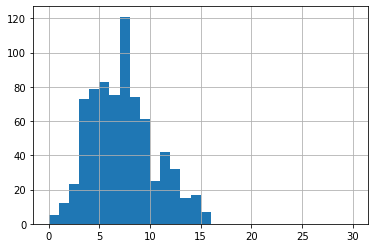

In [125]:
i = 44
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

45
station番号
8.03225806451613
平均
9.132201623757197
分散


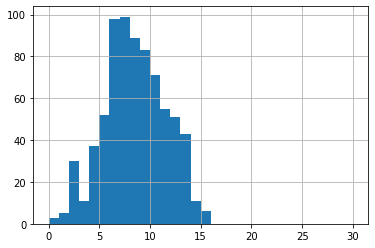

In [126]:
i = 45
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

46
station番号
7.551075268817204
平均
6.123901937799401
分散


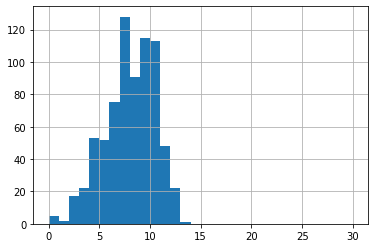

In [127]:
i = 46
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

47
station番号
8.463709677419354
平均
12.254401293795862
分散


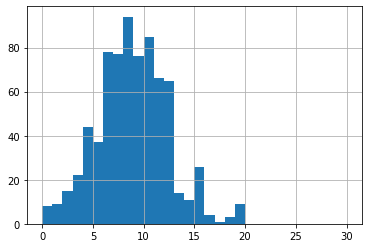

In [128]:
i = 47
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

48
station番号
7.879032258064516
平均
12.324512655754829
分散


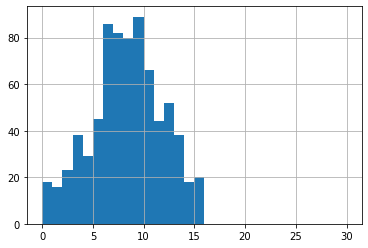

In [129]:
i = 48
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

49
station番号
12.17741935483871
平均
16.72756479833281
分散


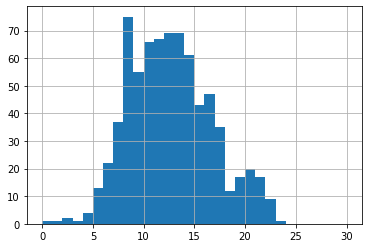

In [130]:
i = 49
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

50
station番号
5.725806451612903
平均
9.036425997481858
分散


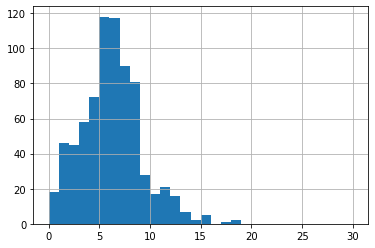

In [131]:
i = 50
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

51
station番号
7.219086021505376
平均
11.934440078727658
分散


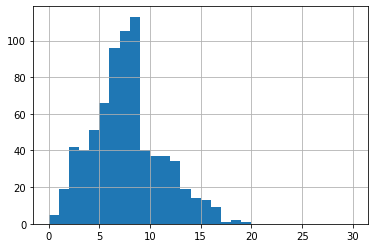

In [132]:
i = 51
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

52
station番号
6.610215053763441
平均
10.730770343999195
分散


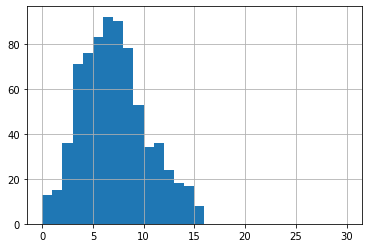

In [133]:
i = 52
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

53
station番号
7.415322580645161
平均
10.068190205357523
分散


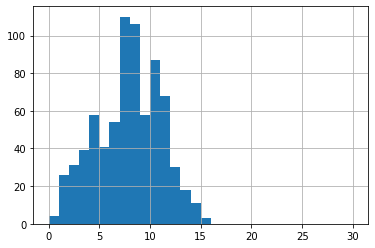

In [134]:
i = 53
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

54
station番号
10.012096774193548
平均
17.928521035036674
分散


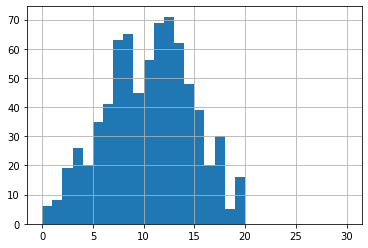

In [135]:
i = 54
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

55
station番号
11.03763440860215
平均
26.547706913269362
分散


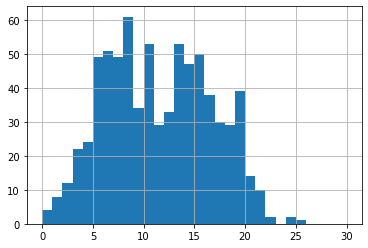

In [136]:
i = 55
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

56
station番号
9.333333333333334
平均
12.109466128308643
分散


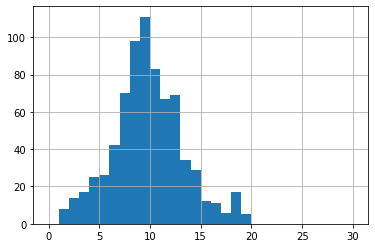

In [137]:
i = 56
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

57
station番号
12.276881720430108
平均
28.84113373565475
分散


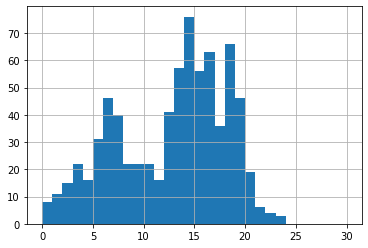

In [138]:
i = 57
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

58
station番号
10.422043010752688
平均
24.042366749156994
分散


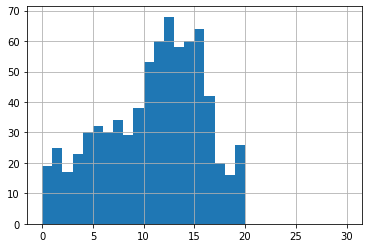

In [139]:
i = 58
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

59
station番号
9.932795698924732
平均
18.733027974355654
分散


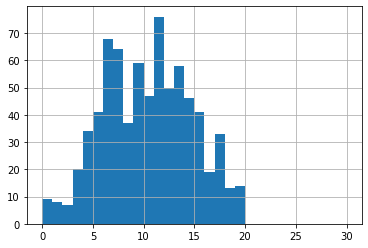

In [140]:
i = 59
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

60
station番号
12.018817204301076
平均
26.0023372262985
分散


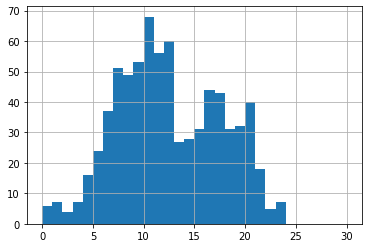

In [141]:
i = 60
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

61
station番号
8.602150537634408
平均
13.588474507590524
分散


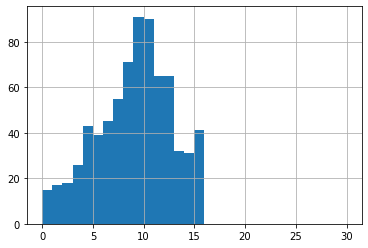

In [142]:
i = 61
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

62
station番号
10.196236559139784
平均
18.836271147194587
分散


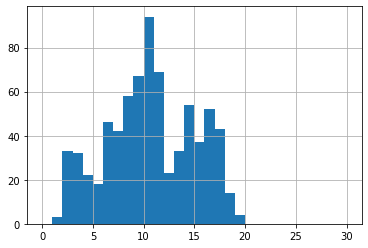

In [143]:
i = 62
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

63
station番号
7.657258064516129
平均
16.998116832370755
分散


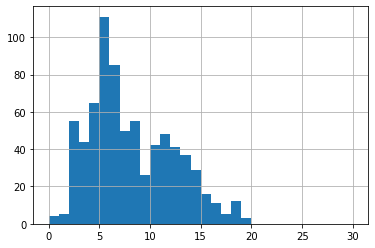

In [144]:
i = 63
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

64
station番号
8.185483870967742
平均
19.179546737290003
分散


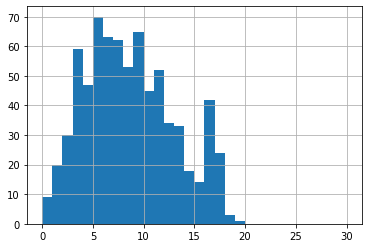

In [145]:
i = 64
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

65
station番号
10.416666666666666
平均
27.209735307312695
分散


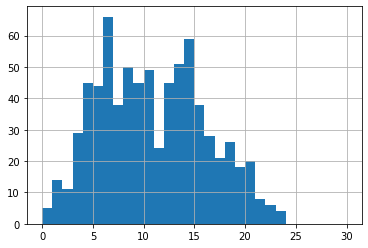

In [146]:
i = 65
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

66
station番号
nan
平均
nan
分散


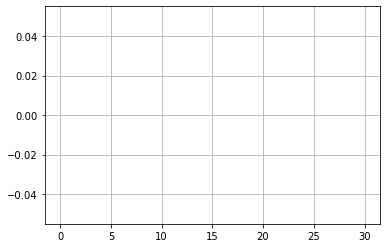

In [147]:
i = 66
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

67
station番号
nan
平均
nan
分散


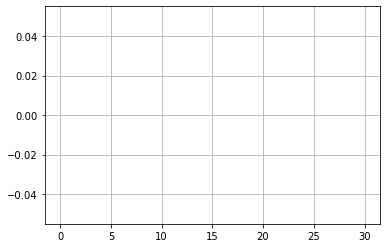

In [148]:
i = 67
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

68
station番号
nan
平均
nan
分散


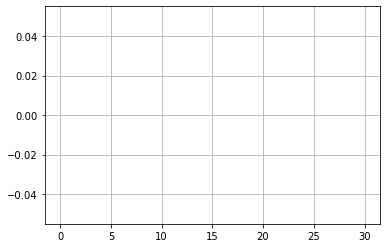

In [149]:
i = 68
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

69
station番号
nan
平均
nan
分散


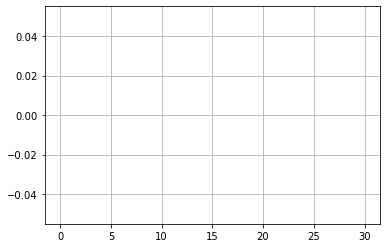

In [150]:
i = 69
print(i)
print("station番号")
test_plot = train[train['station_id'] == i] 
test_plot['bikes_available'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
print(test_plot['bikes_available'].mean())
print("平均")
print(test_plot['bikes_available'].var())
print("分散")

In [6]:
status = pd.read_csv('../../../status.csv')
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str) + '/' + status['hour'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'], format='%Y/%m/%d/%H', infer_datetime_format=True)

#曜日を追加するための関数を定義
def get_weekday_jp(dt):
    w_list = ['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日']
    return(w_list[dt.weekday()])

#dateから曜日情報を取得
status["weekday"] = status["date"].apply(get_weekday_jp)

main_df = status[['date','hour', 'station_id', 'bikes_available', 'weekday', 'day']]

#カテゴリ変数をダミー変数化
main_df = pd.get_dummies(main_df)

train = main_df[main_df['date'] >= '2013-09-01']
train = train[train['date'] < '2014-09-01']

stationid_set = [0, 15, 32, 36, 38, 40, 43, 49, 54, 56] 
dt_now = datetime.datetime.now()
print(dt_now)

2022-02-13 00:10:11.654917


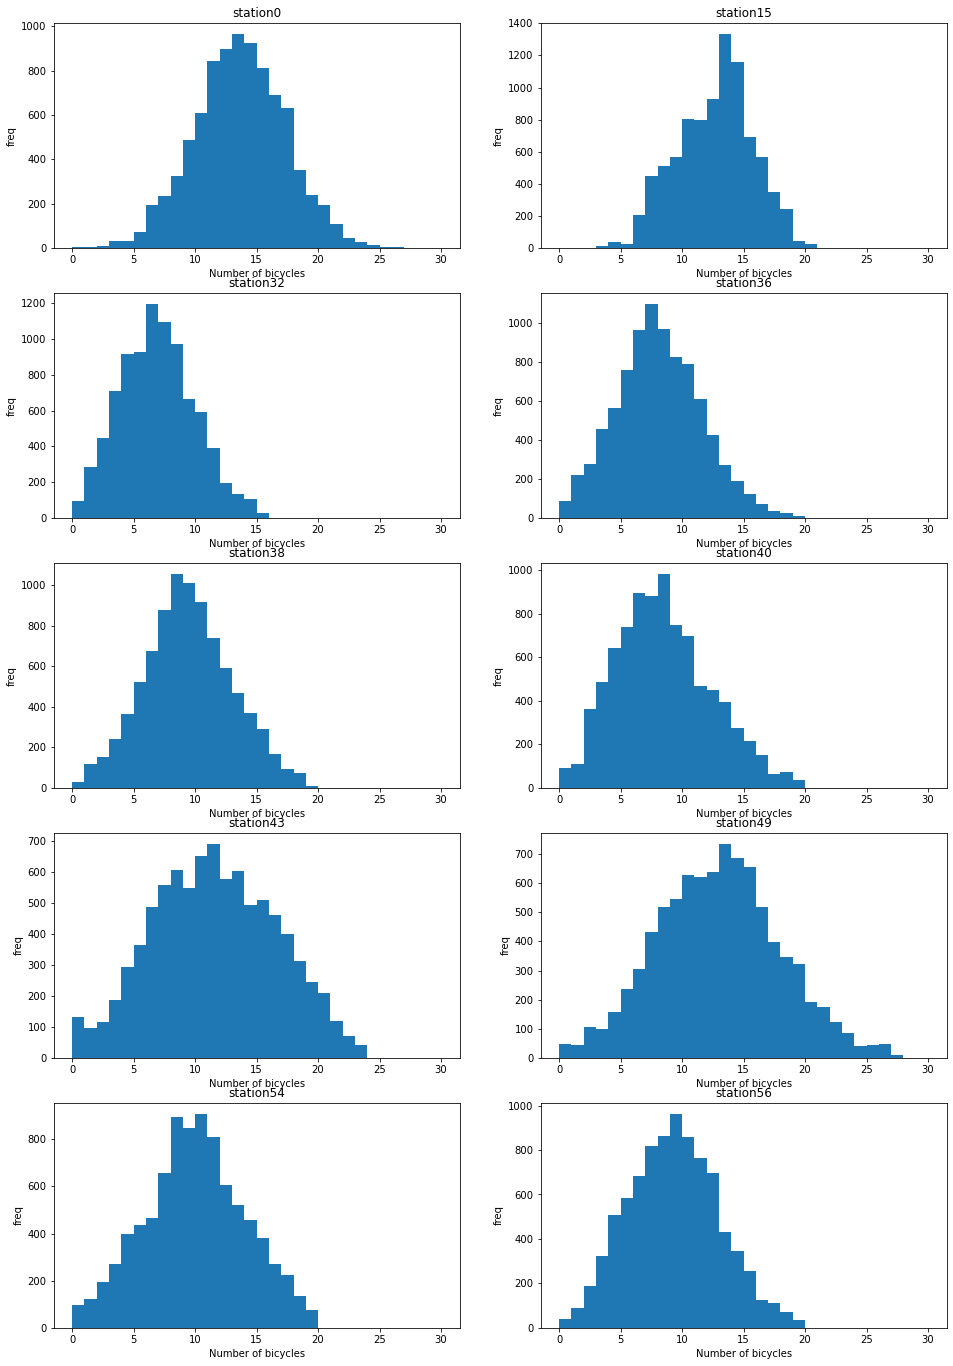

In [3]:
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    figure_name = Figure.add_subplot(5,2,i)
    figure_name.hist(test_plot['bikes_available'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
    title_name = 'station' + str(station_id)
    figure_name.set_title(title_name)
    figure_name.set_xlabel('Number of bicycles')
    figure_name.set_ylabel('freq')
    i += 1

In [4]:
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    print(str(station_id) + "平均")
    print(test_plot['bikes_available'].mean())
    print(str(station_id) + "分散")
    print(test_plot['bikes_available'].var())

0平均
13.145319634703196
0分散
13.686266480765452
15平均
12.163584474885845
15分散
9.490876064332639
32平均
6.445776255707763
32分散
9.118648672389513
36平均
7.6363013698630136
36分散
11.925477356363174
38平均
8.986529680365297
38分散
12.726842162607795
40平均
7.9743150684931505
40分散
14.788585556617292
43平均
11.122488584474885
43分散
25.03956727353063
49平均
12.47203196347032
49分散
24.891328671200824
54平均
9.509703196347031
54分散
16.686513897512224
56平均
8.828538812785387
56分散
13.639966354242079


<Figure size 1152x1728 with 0 Axes>

In [ ]:
array_mean = []
array_var = []
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    array_mean.append(round(test_plot['bikes_available'].mean(), 5 - math.floor(math.log10(abs(test_plot['bikes_available'].mean())))- 1))
    array_var.append(round(test_plot['bikes_available'].var(), 5 - math.floor(math.log10(abs(test_plot['bikes_available'].var())))- 1))

station10 = pd.DataFrame(data=array_mean)
station10["分散"] = array_var
station10
station10.to_csv("table_folder/station_10.csv")

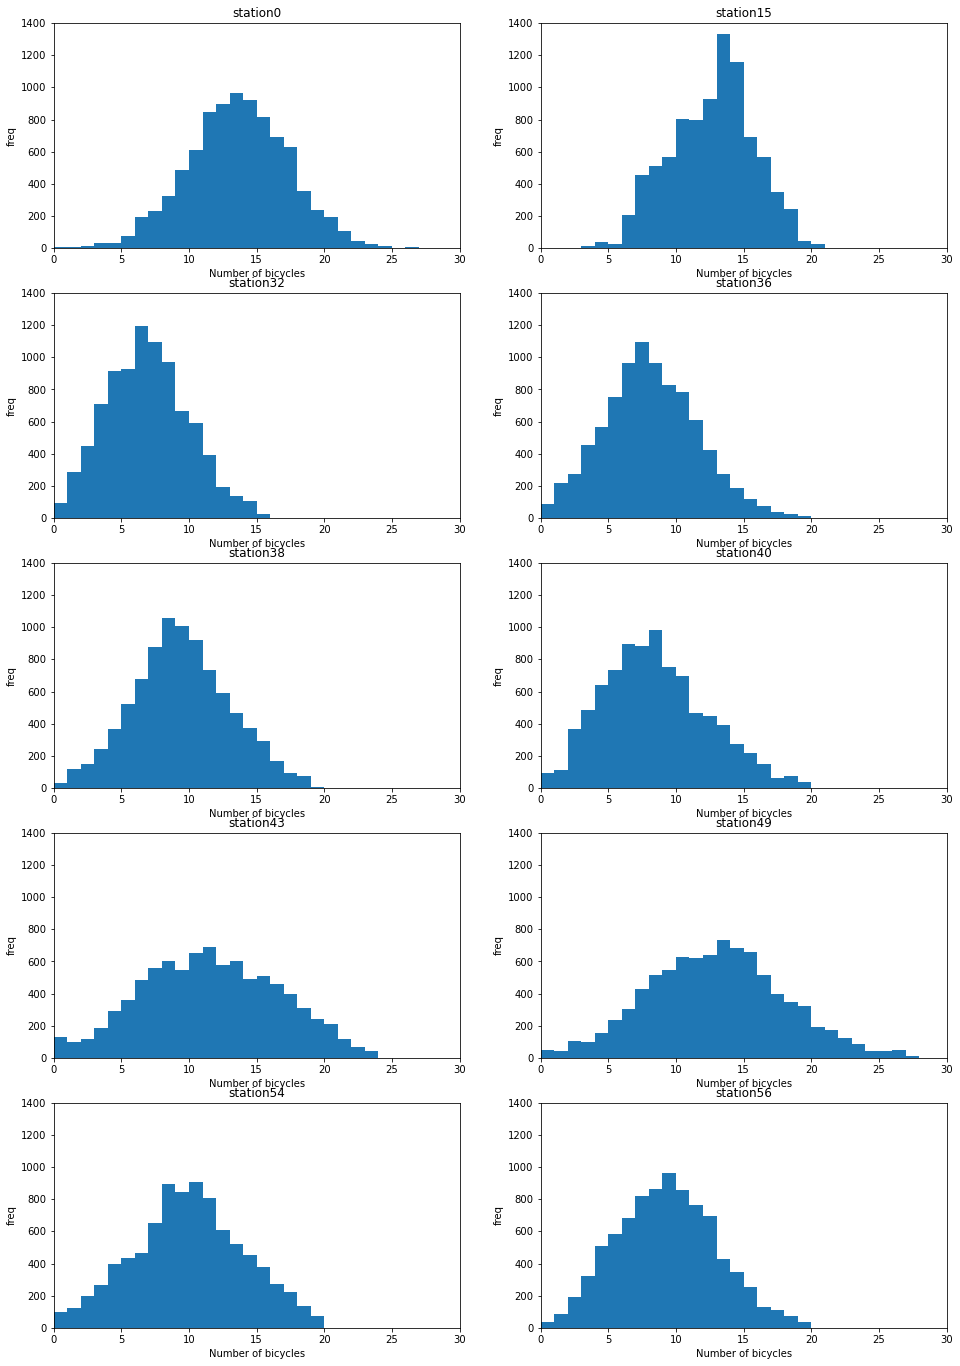

In [7]:
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    figure_name = Figure.add_subplot(5,2,i)
    figure_name.hist(test_plot['bikes_available'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
    title_name = 'station' + str(station_id)
    figure_name.set_title(title_name)
    figure_name.set_xlabel('Number of bicycles')
    figure_name.set_ylabel('freq')
    plt.xlim(0, 30)   
    plt.ylim(0, 1400)   
    i += 1

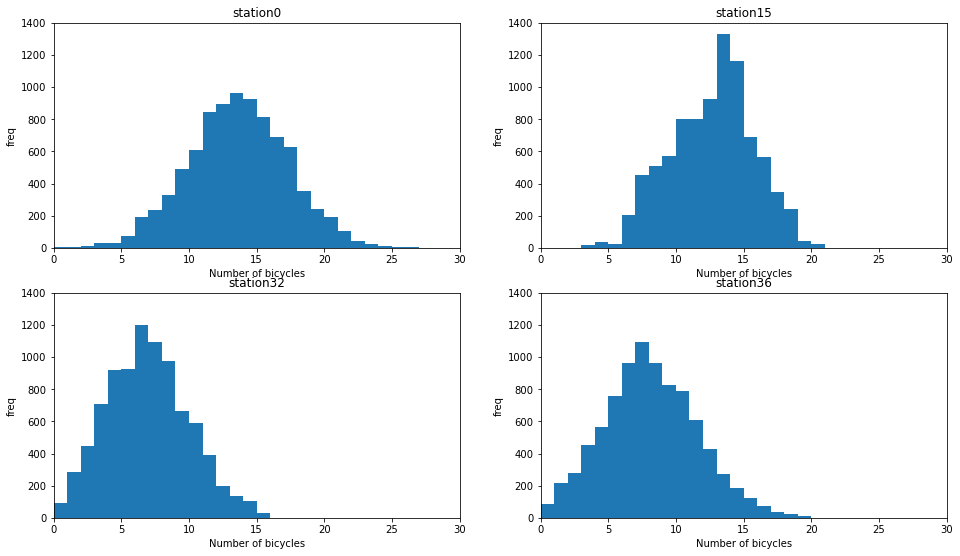

In [8]:
stationid_set = [0, 15, 32, 36] 
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    figure_name = Figure.add_subplot(5,2,i)
    figure_name.hist(test_plot['bikes_available'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
    title_name = 'station' + str(station_id)
    figure_name.set_title(title_name)
    figure_name.set_xlabel('Number of bicycles')
    figure_name.set_ylabel('freq')
    plt.xlim(0, 30)   
    plt.ylim(0, 1400)   
    i += 1

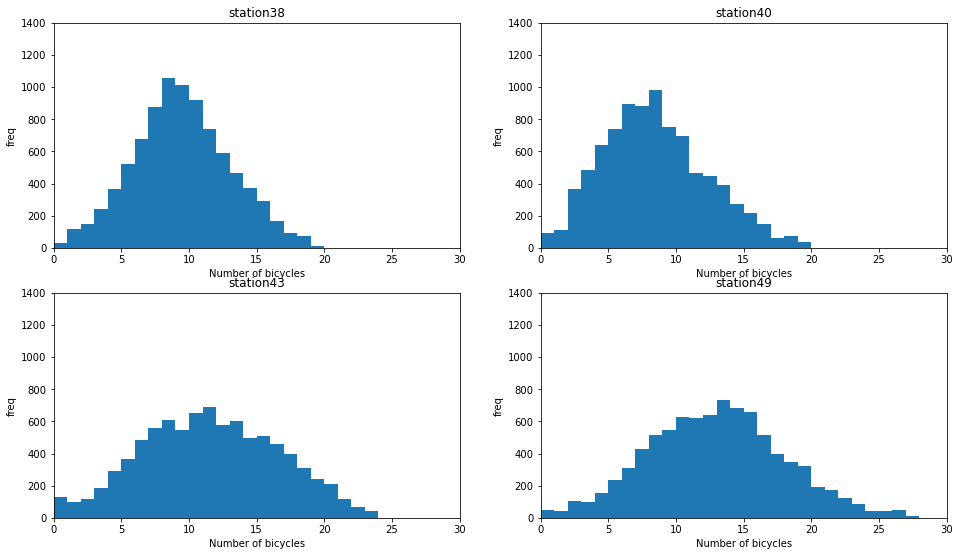

In [9]:
stationid_set = [38, 40, 43, 49] 
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    figure_name = Figure.add_subplot(5,2,i)
    figure_name.hist(test_plot['bikes_available'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
    title_name = 'station' + str(station_id)
    figure_name.set_title(title_name)
    figure_name.set_xlabel('Number of bicycles')
    figure_name.set_ylabel('freq')
    plt.xlim(0, 30)   
    plt.ylim(0, 1400)   
    i += 1

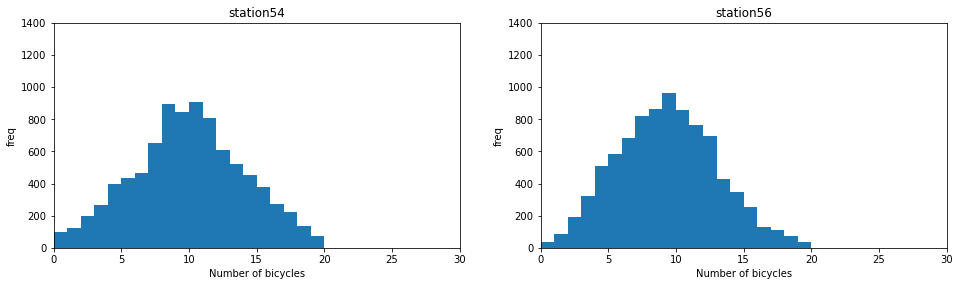

In [10]:
stationid_set = [54, 56] 
Figure = plt.figure(figsize=(16,24))
i = 1
for station_id in stationid_set:
    test_plot = train[train['station_id'] == station_id] 
    figure_name = Figure.add_subplot(5,2,i)
    figure_name.hist(test_plot['bikes_available'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
    title_name = 'station' + str(station_id)
    figure_name.set_title(title_name)
    figure_name.set_xlabel('Number of bicycles')
    figure_name.set_ylabel('freq')
    plt.xlim(0, 30)   
    plt.ylim(0, 1400)   
    i += 1